# [ES-21AC] State and County Prisons 



---
### Professor: Victoria Robinson 
### GSI: Phillip Pierini

The goal os this project is for students to undertand that the can do social work using data. This notebook explores the incarceration tends and impacts of prison realignment in California. 

*Estimated Time: X minutes*

---

### Table of Contents

[THE DATA](#sectiondata)<br>


[CONTEXT](#sectioncontext)<br>


[PRISONS](#section1)<br>
1. [DATA](#subsection1)<br> - [DATA ANALYSIS](#subsection2)<br>
2. [GENERAL: DESIGNED & STAFFED CAPACITY](#subsection3)<br>
3. [GENDER DIVISION](#subsection4)<br>
   

[JAILS](#section2)<br>

1. [DATA](#subsection4)<br>
2. [GENERAL:SENTENCED & UNSENTENCED](#subsection5)<br>
3. [GENDER DIVISION](#subsection6)<br>

---



**Please run the cell below before you begin.**

**Dependencies:**

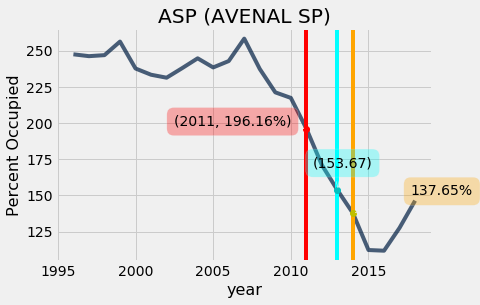

In [2]:
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import ipywidgets as widgets
%run Data_Cleaning_and_Helper_Functions.ipynb

---

## THE DATA <a id='sectiondata'></a>
---

In this notebook, you will use data from two sources. The CDCR (California Department of Corrections and Rehabilitation)
and the Jail Profile Survey provided by the Board of State and Community Corrections (BSCC). 

The CDCR reports the number of people in state prisons across California. On this data set, you wil find information including the capacity (staff & desgin) of each prison, and the current popualtion. This will provide with a fremework to understand prison overcrowding and the effectivenss of policy to reduce it. 

The Jail Profile Survey releases reports on data recorded by local agecies. Some of the valuable information that will find here include the total number of unsetenced and sentences males and females in each of these facilities. This data has been used to determine the needs of each of these counties when determining the distribution state bond monies, and future projections for other jail needs. 

If you are interested in learning more please visit:

[CDCR data and infromation](https://github.com/nrjones8/cdcr-population-data)

[Jail Profile Survey](http://www.bscc.ca.gov/downloads/JPSWorkbook.pdf) 

[Jail Profile Survey data](https://app.bscc.ca.gov/joq//jps/QuerySelection.asp)


---
## CONTEXT  <a id='sectioncontext'></a>
---
During the course, we have learned about the policies of realignment, incarceration, and crime trends in California. By exploring these datasets we hope to get a clear picture of the magnitude of prison and county jail overcrowding per facility and region, and the effects of realignment policies in state prisons and county jails.

Key difference between state prisons and jails involve the process of sentencing. Prisons are designed for long term sentences, while jails are for those who are unsentenced or have short term sentences. (Short-term sentences are generally one year or less.) Prisons are larger and controlled at the state level. In contrast, jails are smaller and handled at by a city or county.

The relationship between the two institutions is emphasized by mass incarceration. Through this activity, we will analyze how overcrowding within California’s state prisons influenced the size of jail populations after realignment policies were implemented.

---
# PRISONS<a id='section1'></a>
---
We will start by observing California's state prisons using the data we found through the CDCR (California Department of Corrections and Rehabilitation).


## 0. DATA<a id='subsection1'></a>
---

### 0.1  Data Dictionary 

Below you will find a data dictionary for future reference. 

|Column Name   | Description |
|--------------|---------|
|year |Year that the data was collected  |
|month | Month that the data was collected |
|institution_name |  Abbreviated Name of the State Prison|
|population_felons | People imprisoned for committing felony (serious or violent crime) |
|civil_addict | People imprisoned for drug related offenses |
|total_population | Sum of civil addict and population felons columns|
|designed_capacity | Max number of people the prison was built to hold|
|percent_occupied | ...|
|staffed_capacity | Max number of people the prison can hold based on the number of people employed|

### 0.2 Importing the Data


On the cell below we will import the tabular data from `monthly_cdcr.csv` into a table, and save it into a variable names `data`.

In [3]:
prisons = Table().read_table("monthly_cdcr.csv")

Since we will try to understand trends over time, it might be helpful to **sort** the data by year. We will do this by running the cell below using the `sort` function:

In [4]:
prisons.sort("year").show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760


---
# 1. Data Analysis<a id='subsection2'></a>
---

When processing a new data set, it is a good idea to play around with the data, and try to combine it in different ways. To start it's good to think about how many times we expect each prison to occur in our dataset, and how many times they **actually** appear. 

Our dataset is made up of prisons in California from the year 1996 to 2018. The counts in our data set were done monthly, meaning for each year we expect there to be at most 12 counts for each prison. Let's calculate the number of times we expect each prison to appear.

In [5]:
months = 12
years = 2018 - 1996 + 1 # add 1 so that 1996 is included.

months * years

276

We would expect there to be a maximum number of times for a single institution to appear to be 276 times, which is equivalent to once a month for 23 years.

To find the number of times that each institution appears in our data set, we would have to group by the institution name. Essentially, we want out computer to make groups that only have values from the same prison. After we have made these groups, we want to group how many things we have in each group. 

The code that corresponds to this is to use the function `group()`. The `group()` function takes in a column name, and puts all the similar values in that column into groups, then it counts the number of items in the group.

Then, we can use the `sort()` function to order the counts in a specific order.

In [6]:
prisons.group("institution_name").sort("count", descending = True).show()

institution_name,count
SCC (SIERRA CONSERVATION CENTER),392
"LAC (CA SP, LOS ANGELES COUNTY)",283
VSP (VALLEY SP),279
WSP (WASCO SP),276
SQ (SAN QUENTIN SP),276
"SOL (CA SP, SOLANO)",276
"SAC (CA SP, SACRAMENTO)",276
RJD (RJ DONOVAN CORRECTIONAL FAC),276
PVSP (PLEASANT VALLEY SP),276
PBSP (PELICAN BAY SP),276


What do we notice from this table? We can see that there are values in our table that went against what we had expected. We had expected all prisons to appear 276 times, but we can see that there are prisons with less than and greater than 276.

*Possible Explanations*:
- Less than 276: these prisons do not have data over all 23 years, they are may be missing information or their dates do not start in 1996.
- Greater than 276: these prisons have multiple counts for some months.


The case where we have counts greater than 276 is interesting. Why would do we need two separate counts of the number of people in a prison? What is the significance of these counts, meaning what makes one count in a month different from the other count in that same month. 

To understand why we have different counts, we must research those interesting prisons. Thus, the prisons we will be observing in the rest of this section are:
- Valley State Prison (VSP)
- Sierra Conservation Center (SCC)
- Los Angeles County State Prison (LAC)


## The Case of Valley State Prison

Let's start by looking at the Valley State Prison (VSP). To look at only this prison, we will get the rows in our table that only have VSP as the `institution_name`.

In [7]:
vsp = prisons.where("institution_name", "VSP (VALLEY SP)")
vsp

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
34,1996,2,VSP (VALLEY SP),2096,0,2096,1980,105.9,2184
68,1996,3,VSP (VALLEY SP),2326,7,2333,2380,98,2584
102,1996,4,VSP (VALLEY SP),2498,13,2511,2380,105.5,2584
136,1996,5,VSP (VALLEY SP),2562,9,2571,2380,108,2584
171,1996,6,VSP (VALLEY SP),2549,12,2561,1980,129.3,2592
205,1996,7,VSP (VALLEY SP),2789,31,2820,1980,142.4,2592
239,1996,8,VSP (VALLEY SP),2750,8,2758,1980,139.3,2592
273,1996,9,VSP (VALLEY SP),2693,17,2710,1980,136.9,2592
307,1996,10,VSP (VALLEY SP),2751,6,2757,1980,139.2,2592


To break down why VSP had more than 276 records, we have to find the years that had more than 12 months of data. To do this, we will group by year, and see the number of times each year appeared. We will use the same methods that we did to see how many months were in each year. The functions are called `group()` and `sort()`.  

In [8]:
vsp.group("year").sort("count", descending = True)

year,count
2012,15
2018,12
2017,12
2016,12
2015,12
2014,12
2013,12
2011,12
2010,12
2009,12


From the table, we see that there is one year that had 15 months of data. Now that we have isolated a strange event in our dataset, we want to research the reason behind this event. We researched major changes to the Valley State Prison in 2012. From our research, we realized that Valley State Prison changed from a female prison to a male prison in 2012  (October 2012 to be exact). For future analysis, it would be better to separate VSP into its' female and male years.

**SEPARATING THE DATA**

To start, let's isolate the year where we see double counts in our months. We want to select the rows in our `vsp` table that were recorded in 2012. We can do this with the function `where()`. The `where()` function searches through our table and finds the rows that have the value we want in a certain column. 

The format for the function is:
- *data_table.*`where(`*column_name, specified_values_in_column*`)`

In this example, we want to find the values in the table that correspond to the year 2012.

In [9]:
twenty_12 = vsp.where("year", 2012)
twenty_12

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
6588,2012,1,VSP (VALLEY SP),2650,0,2650,1980,133.8,2899
6621,2012,2,VSP (VALLEY SP),2550,0,2550,1980,128.8,2701
6654,2012,3,VSP (VALLEY SP),2432,0,2432,1980,122.8,2497
6687,2012,4,VSP (VALLEY SP),2296,0,2296,1980,116,2305
6720,2012,5,VSP (VALLEY SP),2209,0,2209,1980,111.6,2305
6753,2012,6,VSP (VALLEY SP),2142,0,2142,1980,108.2,2305
6786,2012,7,VSP (VALLEY SP),1995,0,1995,1980,100.8,2101
6819,2012,8,VSP (VALLEY SP),1866,0,1866,1980,94.2,2009
6852,2012,9,VSP (VALLEY SP),1721,0,1721,1980,86.9,1692
6885,2012,10,VSP (VALLEY SP),1171,0,1171,1536,76.2,1248


Within 2012, we want to separate the months that are repeated from those that only occur once.

In [10]:
questionable_2012 = twenty_12.where("month", are.above(9))
questionable_2012

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
6885,2012,10,VSP (VALLEY SP),1171,0,1171,1536,76.2,1248
6889,2012,10,VSP (VALLEY SP),445,0,445,444,100.2,488
6919,2012,11,VSP (VALLEY SP),720,0,720,1536,46.9,1020
6923,2012,11,VSP (VALLEY SP),937,0,937,444,211,632
6953,2012,12,VSP (VALLEY SP),274,0,274,1536,17.8,650
6957,2012,12,VSP (VALLEY SP),1353,0,1353,444,304.7,1032


The prison was officially female before October 2012, and was male from 2013 forward. The questionable period was from October 2012 to December 2012. To start separating this data by gender, we will first find the years that we know are definitely female or male. 

To find the female years, we look in our vsp table for the years before 2012. To do this we use the condition, `are.below()` which gives all the values below 2012 which will be 1996-2011.

In [11]:
female_vsp = vsp.where("year", are.below(2012)) 
female_vsp

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
34,1996,2,VSP (VALLEY SP),2096,0,2096,1980,105.9,2184
68,1996,3,VSP (VALLEY SP),2326,7,2333,2380,98,2584
102,1996,4,VSP (VALLEY SP),2498,13,2511,2380,105.5,2584
136,1996,5,VSP (VALLEY SP),2562,9,2571,2380,108,2584
171,1996,6,VSP (VALLEY SP),2549,12,2561,1980,129.3,2592
205,1996,7,VSP (VALLEY SP),2789,31,2820,1980,142.4,2592
239,1996,8,VSP (VALLEY SP),2750,8,2758,1980,139.3,2592
273,1996,9,VSP (VALLEY SP),2693,17,2710,1980,136.9,2592
307,1996,10,VSP (VALLEY SP),2751,6,2757,1980,139.2,2592


For the male years, we look for where the year values are above 2012.

In [12]:
male_vsp = vsp.where("year", are.above(2012)) 
male_vsp

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
6991,2013,1,VSP (VALLEY SP),1936,0,1936,1980,97.8,1932
7025,2013,2,VSP (VALLEY SP),2429,0,2429,1980,122.7,2332
7059,2013,3,VSP (VALLEY SP),2842,0,2842,1980,143.5,2332
7093,2013,4,VSP (VALLEY SP),3103,0,3103,1980,156.7,2970
7127,2013,5,VSP (VALLEY SP),3195,0,3195,1980,161.4,2970
7161,2013,6,VSP (VALLEY SP),3166,0,3166,1980,159.9,2970
7195,2013,7,VSP (VALLEY SP),3105,0,3105,1980,156.8,2970
7230,2013,8,VSP (VALLEY SP),3157,0,3157,1980,159.4,2970
7265,2013,9,VSP (VALLEY SP),3258,0,3258,1980,164.5,2948
7300,2013,10,VSP (VALLEY SP),3290,0,3290,1980,166.2,3389


Now, we can start dealing with 2012. To start let's find the values that are definitely female in 2012. We do this by searching for the months that have values that occur only once.

In [13]:
female_2012 = twenty_12.where("month", are.below_or_equal_to(9))
female_2012

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
6588,2012,1,VSP (VALLEY SP),2650,0,2650,1980,133.8,2899
6621,2012,2,VSP (VALLEY SP),2550,0,2550,1980,128.8,2701
6654,2012,3,VSP (VALLEY SP),2432,0,2432,1980,122.8,2497
6687,2012,4,VSP (VALLEY SP),2296,0,2296,1980,116,2305
6720,2012,5,VSP (VALLEY SP),2209,0,2209,1980,111.6,2305
6753,2012,6,VSP (VALLEY SP),2142,0,2142,1980,108.2,2305
6786,2012,7,VSP (VALLEY SP),1995,0,1995,1980,100.8,2101
6819,2012,8,VSP (VALLEY SP),1866,0,1866,1980,94.2,2009
6852,2012,9,VSP (VALLEY SP),1721,0,1721,1980,86.9,1692


To add the months in 2012 to the other female years, we will use the `with_rows()` function. This function allows you to add all the rows in your table to another table. To get all the rows within table we use the function `rows`. 

The format we will use is:
- *data_table_one.*`with_rows(`*data_table_two*.`rows)`

In [14]:
all_fem_vsp = female_vsp.with_rows(female_2012.rows)
all_fem_vsp.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
34,1996,2,VSP (VALLEY SP),2096,0,2096,1980,105.9,2184
68,1996,3,VSP (VALLEY SP),2326,7,2333,2380,98,2584
102,1996,4,VSP (VALLEY SP),2498,13,2511,2380,105.5,2584
136,1996,5,VSP (VALLEY SP),2562,9,2571,2380,108,2584


We will also create a new table that will contain all the final values that correspond to when vsp was a male institution.

In [15]:
all_male_vsp = male_vsp
all_male_vsp.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
6991,2013,1,VSP (VALLEY SP),1936,0,1936,1980,97.8,1932
7025,2013,2,VSP (VALLEY SP),2429,0,2429,1980,122.7,2332
7059,2013,3,VSP (VALLEY SP),2842,0,2842,1980,143.5,2332
7093,2013,4,VSP (VALLEY SP),3103,0,3103,1980,156.7,2970
7127,2013,5,VSP (VALLEY SP),3195,0,3195,1980,161.4,2970


The next piece of code is a bit advanced for our activity. We will not break down what each part of the code does, but give an overview instead. (If you would like to learn more about what this code is doing, please follow this link: https://www.w3schools.com/python/python_for_loops.asp )

The following code separates the rows that correspond to the female institution into the all_fem_vsp table, and all the rows that correspond to the male institution into the all_male_vsp table.

In [16]:
for i in np.arange(questionable_2012.num_rows):
    if i % 2 == 0:
        all_fem_vsp = all_fem_vsp.with_row(questionable_2012.row(i))
    else:
        all_male_vsp = all_male_vsp.with_row(questionable_2012.row(i))

In [17]:
all_fem_vsp.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
34,1996,2,VSP (VALLEY SP),2096,0,2096,1980,105.9,2184
68,1996,3,VSP (VALLEY SP),2326,7,2333,2380,98,2584
102,1996,4,VSP (VALLEY SP),2498,13,2511,2380,105.5,2584
136,1996,5,VSP (VALLEY SP),2562,9,2571,2380,108,2584


In [18]:
all_male_vsp.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
6991,2013,1,VSP (VALLEY SP),1936,0,1936,1980,97.8,1932
7025,2013,2,VSP (VALLEY SP),2429,0,2429,1980,122.7,2332
7059,2013,3,VSP (VALLEY SP),2842,0,2842,1980,143.5,2332
7093,2013,4,VSP (VALLEY SP),3103,0,3103,1980,156.7,2970
7127,2013,5,VSP (VALLEY SP),3195,0,3195,1980,161.4,2970


A way to double check that we did this right, we can check that the number of rows in both tables sums up to the number of rows in our original table. We have a function that will count the number of rows in our table for us. The function is called `num_rows`. This returns a number and we can treat the calculation as number so we can add two of these statements.

The format for this function is:
- *data_table.*`num_rows`

The number of rows in the unseparated table:

In [19]:
vsp.num_rows

279

The number of rows after we have split the table into its female and male parts:

In [20]:
all_fem_vsp.num_rows + all_male_vsp.num_rows

279

They match! This means we have all the data from our original table split into the two tables. Now that we have the two values separated, we want a way to distinguish them from each other.

**RENAMING**

The following cell makes the new name for each of the rows in our `all_female_vsp` table. The new name is "VALLEY SP (FEMALE)".

In [26]:
new_prison_name_female = np.array([])
for i in np.arange(all_fem_vsp.num_rows):
    new_prison_name_female = np.append(new_prison_name_female, "VALLEY SP (FEMALE)")
new_prison_name_female

array(['VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)',
       'VALLEY SP (FEMALE)', 'VALLEY SP (FEMALE)', 

The next cell creates the new names for the `all_male_vsp` table. We will rename them "VALLEY SP (MALE)"

In [27]:
new_prison_name_male = np.array([])
for i in np.arange(all_male_vsp.num_rows):
    new_prison_name_male = np.append(new_prison_name_male, "VALLEY SP (MALE)")
new_prison_name_male

array(['VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MALE)',
       'VALLEY SP (MALE)', 'VALLEY SP (MALE)', 'VALLEY SP (MAL

Now that we have the new names for the rows in our table, we will update the values in our table. To do this we will be change the name of the institution in our table. Currently the name is "VSP (VALLEY SP)" for all rows in our table, but we want to replace it with the new names. 

To do this we are using the function `with_column()`. This function either adds a new column to our table or replaces an old column with new values. The format for the function is to:
- *data_table.*`with_column(`*column_name*, *column_values*`)`

If the *column_name* already exists in our table, then it will update the values. In our case we want to update the values in "institution_name" with the values `new_prison_name_female`.

In [132]:
modified_vsp_fem_name = all_fem_vsp.with_column("institution_name", new_prison_name_female)
modified_vsp_fem_name

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VALLEY SP (FEMALE),2294,0,2294,1980,115.9,1980
34,1996,2,VALLEY SP (FEMALE),2096,0,2096,1980,105.9,2184
68,1996,3,VALLEY SP (FEMALE),2326,7,2333,2380,98,2584
102,1996,4,VALLEY SP (FEMALE),2498,13,2511,2380,105.5,2584
136,1996,5,VALLEY SP (FEMALE),2562,9,2571,2380,108,2584
171,1996,6,VALLEY SP (FEMALE),2549,12,2561,1980,129.3,2592
205,1996,7,VALLEY SP (FEMALE),2789,31,2820,1980,142.4,2592
239,1996,8,VALLEY SP (FEMALE),2750,8,2758,1980,139.3,2592
273,1996,9,VALLEY SP (FEMALE),2693,17,2710,1980,136.9,2592
307,1996,10,VALLEY SP (FEMALE),2751,6,2757,1980,139.2,2592


Likewise, we want to update the all_male_vsp table with the values `new_prison_name_male`.

In [30]:
modified_vsp_male_name = all_male_vsp.with_column("institution_name", new_prison_name_male)
modified_vsp_male_name

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
6991,2013,1,VALLEY SP (MALE),1936,0,1936,1980,97.8,1932
7025,2013,2,VALLEY SP (MALE),2429,0,2429,1980,122.7,2332
7059,2013,3,VALLEY SP (MALE),2842,0,2842,1980,143.5,2332
7093,2013,4,VALLEY SP (MALE),3103,0,3103,1980,156.7,2970
7127,2013,5,VALLEY SP (MALE),3195,0,3195,1980,161.4,2970
7161,2013,6,VALLEY SP (MALE),3166,0,3166,1980,159.9,2970
7195,2013,7,VALLEY SP (MALE),3105,0,3105,1980,156.8,2970
7230,2013,8,VALLEY SP (MALE),3157,0,3157,1980,159.4,2970
7265,2013,9,VALLEY SP (MALE),3258,0,3258,1980,164.5,2948
7300,2013,10,VALLEY SP (MALE),3290,0,3290,1980,166.2,3389


**ADD VALUES BACK TO THE ORIGINAL TABLE**

Now that we that we have identified and labeled when VSP was a male or female institution, we want to add these values back to the original table. To do this, we will add the values to a table without VSP in it.

To find a table without VSP values, we need all the rows where VSP is not in the institution_name. We will use the `where()` function.

In [35]:
without_vsp = prisons.where("institution_name", are.not_equal_to("VSP (VALLEY SP)"))
without_vsp

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
7,1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
8,1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
9,1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566
10,1996,1,PVSP (PLEASANT VALLEY SP),4080,0,4080,2208,184.8,4008


To combine this table with the modified values we will use the `with_rows()` function that we used above. We want to add all the rows from our modified tables to the table without vsp. We do this for both male and female values.

The format to add all the rows from one table to another is:
- *data_table_one.*`with_rows(`*data_table_two*.`rows)`

(A good way to double check that we did this correctly is to see that there are 9501 rows in our table which is the same as 5 shown and 9496 omitted.)

In [37]:
prisons_updated = without_vsp.with_rows(modified_vsp_fem_name.rows).with_rows(modified_vsp_male_name.rows)
prisons_updated.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646


At this point, we have modified our original table, so that we could later on differentiate between female and male prisons and we have named that value `prisons_updated`.

## The Case of Sierra Conservation Center (SCC)

Similar to Valley State Prison, the Sierra Conservation Center had an unexpected number of entries in the table. We want to find out why this differences exists. Let's start by looking at the Sierra Conservation Center (SCC). To look at only this prison, we will get the rows in our table that only have "Sierra Conservation Center (SCC)" as the `institution_name`.

In [41]:
sierra_cc = prisons.where("institution_name", "SCC (SIERRA CONSERVATION CENTER)")
sierra_cc.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
7,1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
35,1996,2,SCC (SIERRA CONSERVATION CENTER),310,0,310,320,96.9,320
41,1996,2,SCC (SIERRA CONSERVATION CENTER),5912,0,5912,3606,163.9,5884
69,1996,3,SCC (SIERRA CONSERVATION CENTER),327,0,327,320,102.2,320


To break down why Sierra CC had 392 records in the span of 23 years, we have to find the years that had more than 12 months of data. To do this, we will group by year, and see the number of times each year appeared. We will use the same methods that we did to see how many months were in each year. The functions are called `group()` and `sort()`.  

In [42]:
sierra_cc.group("year").show()

year,count
1996,24
1997,24
1998,24
1999,24
2000,24
2001,24
2002,24
2003,24
2004,24
2005,20


From this table, we can see that from 1996 to 2004, there was double the number of counts for each month. This could mean that the institution was measuring two different populations. To understand why this difference exists, we had to do research beyond the data. 
# ...

**SEPARATING THE DATA**

To separate the two groups, we will isolate the double counts from the single counts. From the table above, we see that there are double counts from 1996-2004, single counts from 2006-2018, and a mixture in 2005. We will separate our data into those three groups by using the `where()` function.

The format for the `where()` function is:
- *data_table.*`where(`*column_name, specified_values_in_column*`)`


In [43]:
double_count = sierra_cc.where("year", are.between_or_equal_to(1996, 2004))
double_count.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
7,1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
35,1996,2,SCC (SIERRA CONSERVATION CENTER),310,0,310,320,96.9,320
41,1996,2,SCC (SIERRA CONSERVATION CENTER),5912,0,5912,3606,163.9,5884
69,1996,3,SCC (SIERRA CONSERVATION CENTER),327,0,327,320,102.2,320


In [46]:
single_counts = sierra_cc.where('year', are.above(2005))
single_counts.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4156,2006,1,SCC (SIERRA CONSERVATION CENTER),6135,1,6136,3606,170.2,6107
4191,2006,2,SCC (SIERRA CONSERVATION CENTER),6229,1,6230,3606,172.8,6107
4226,2006,3,SCC (SIERRA CONSERVATION CENTER),6258,0,6258,3606,173.5,6107
4261,2006,4,SCC (SIERRA CONSERVATION CENTER),6221,0,6221,3606,172.5,6107
4296,2006,5,SCC (SIERRA CONSERVATION CENTER),6101,0,6101,3606,169.2,6107


In [52]:
sierra_2005 = sierra_cc.where('year', 2005)
sierra_2005.show()

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
3740,2005,1,SCC (SIERRA CONSERVATION CENTER),281,0,281,320,87.8,320
3745,2005,1,SCC (SIERRA CONSERVATION CENTER),6025,0,6025,3606,167.1,6107
3774,2005,2,SCC (SIERRA CONSERVATION CENTER),291,0,291,320,90.9,320
3779,2005,2,SCC (SIERRA CONSERVATION CENTER),6051,0,6051,3606,167.8,6107
3808,2005,3,SCC (SIERRA CONSERVATION CENTER),292,0,292,320,91.3,320
3813,2005,3,SCC (SIERRA CONSERVATION CENTER),6137,0,6137,3606,170.2,6107
3842,2005,4,SCC (SIERRA CONSERVATION CENTER),276,0,276,320,86.3,320
3847,2005,4,SCC (SIERRA CONSERVATION CENTER),6185,0,6185,3606,171.5,6107
3876,2005,5,SCC (SIERRA CONSERVATION CENTER),288,0,288,320,90,320
3881,2005,5,SCC (SIERRA CONSERVATION CENTER),6099,0,6099,3606,169.1,6107


For 2005, we will need to break up the year into two groups: double counts in 2005 and single counts in 2005. We can see that there are double counts from January to August and single counts from September to December.

In [54]:
double_2005 = sierra_2005.where('month', are.below(9))
double_2005.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
3740,2005,1,SCC (SIERRA CONSERVATION CENTER),281,0,281,320,87.8,320
3745,2005,1,SCC (SIERRA CONSERVATION CENTER),6025,0,6025,3606,167.1,6107
3774,2005,2,SCC (SIERRA CONSERVATION CENTER),291,0,291,320,90.9,320
3779,2005,2,SCC (SIERRA CONSERVATION CENTER),6051,0,6051,3606,167.8,6107
3808,2005,3,SCC (SIERRA CONSERVATION CENTER),292,0,292,320,91.3,320


In [55]:
single_2005 = sierra_2005.where('month', are.above_or_equal_to(9))
single_2005

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4019,2005,9,SCC (SIERRA CONSERVATION CENTER),6022,0,6022,3606,167,6107
4053,2005,10,SCC (SIERRA CONSERVATION CENTER),6164,0,6164,3606,170.9,6107
4087,2005,11,SCC (SIERRA CONSERVATION CENTER),6165,0,6165,3606,171,6107
4121,2005,12,SCC (SIERRA CONSERVATION CENTER),6165,1,6166,3606,171,6107


Now that we have identitfied all the double and single counts. It will be easier if we combine all the single and all the double counts into the same tables. To do this we will combine the tables using the `with_rows()` function.

The format to add all the rows from one table to another is:
- *data_table_one.*`with_rows(`*data_table_two*.`rows)`


In [58]:
all_double_sierra = double_count.with_rows(double_2005.rows)
all_double_sierra.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
7,1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
35,1996,2,SCC (SIERRA CONSERVATION CENTER),310,0,310,320,96.9,320
41,1996,2,SCC (SIERRA CONSERVATION CENTER),5912,0,5912,3606,163.9,5884
69,1996,3,SCC (SIERRA CONSERVATION CENTER),327,0,327,320,102.2,320


In [60]:
all_single_sierra = single_counts.with_rows(single_2005.rows)
all_single_sierra.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4156,2006,1,SCC (SIERRA CONSERVATION CENTER),6135,1,6136,3606,170.2,6107
4191,2006,2,SCC (SIERRA CONSERVATION CENTER),6229,1,6230,3606,172.8,6107
4226,2006,3,SCC (SIERRA CONSERVATION CENTER),6258,0,6258,3606,173.5,6107
4261,2006,4,SCC (SIERRA CONSERVATION CENTER),6221,0,6221,3606,172.5,6107
4296,2006,5,SCC (SIERRA CONSERVATION CENTER),6101,0,6101,3606,169.2,6107


With both the single and double counts identified, we can separate the double counts into two groups. The values in one group remain in the hundreds while the other groups has thousands. We will create two tables to add to one for large counts and another for smaller counts.

You do not need to understand the following code. It separates our table with double values into two new tables, where one table has small values and the other table has all of the larger values.

In [100]:
large_counts_table = Table(sierra_cc.labels)
small_counts_table = Table(sierra_cc.labels)


for i in np.arange(all_double_sierra.num_rows):
    if i % 2 == 0:
        small_counts_table = small_counts_table.with_row(all_double_sierra.row(i))
    else:
        large_counts_table = large_counts_table.with_row(all_double_sierra.row(i))

In [101]:
small_counts_table.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
35,1996,2,SCC (SIERRA CONSERVATION CENTER),310,0,310,320,96.9,320
69,1996,3,SCC (SIERRA CONSERVATION CENTER),327,0,327,320,102.2,320
103,1996,4,SCC (SIERRA CONSERVATION CENTER),312,0,312,320,97.5,320
137,1996,5,SCC (SIERRA CONSERVATION CENTER),320,0,320,320,100,320


In [102]:
large_counts_table.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
7,1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
41,1996,2,SCC (SIERRA CONSERVATION CENTER),5912,0,5912,3606,163.9,5884
75,1996,3,SCC (SIERRA CONSERVATION CENTER),5912,0,5912,3606,163.9,5884
109,1996,4,SCC (SIERRA CONSERVATION CENTER),5979,0,5979,3606,165.8,5884
143,1996,5,SCC (SIERRA CONSERVATION CENTER),5884,0,5884,3606,163.2,5884


We can see that all the smaller values are in the same table while all the larger values are in the same table. We want these larger counts to be combined with those larger counts in the original table. We saved the larger counts that appeared only once in our table under the name all_single_sierra, so we will add our larger counts to that table using the `with_rows()` function. 

The format is: *data_table_one.*`with_rows(`*data_table_two*.`rows)`

In [103]:
all_larger_values = all_single_sierra.with_rows(large_counts_table.rows).sort('year')
all_larger_values.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
7,1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
41,1996,2,SCC (SIERRA CONSERVATION CENTER),5912,0,5912,3606,163.9,5884
75,1996,3,SCC (SIERRA CONSERVATION CENTER),5912,0,5912,3606,163.9,5884
109,1996,4,SCC (SIERRA CONSERVATION CENTER),5979,0,5979,3606,165.8,5884
143,1996,5,SCC (SIERRA CONSERVATION CENTER),5884,0,5884,3606,163.2,5884


For the smaller counts, there is not a table to add them to, because they are the only occurrences within our sierra table, so we can leave them as is.

In [82]:
small_counts_table.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
35,1996,2,SCC (SIERRA CONSERVATION CENTER),310,0,310,320,96.9,320
69,1996,3,SCC (SIERRA CONSERVATION CENTER),327,0,327,320,102.2,320
103,1996,4,SCC (SIERRA CONSERVATION CENTER),312,0,312,320,97.5,320
137,1996,5,SCC (SIERRA CONSERVATION CENTER),320,0,320,320,100,320


**RENAMING**

We have two clear distinct groups, and want to add them back to our original table, but to do so we must rename them to be able to distinguish them in the future. The two cells create a list of names that we will use as our columns. (They will not output anything.)

In [105]:
sierra_prison_institution_name = np.array([])
for i in np.arange(all_larger_values.num_rows):
    sierra_prison_institution_name = np.append(sierra_prison_institution_name, "SIERRA CONSERVATION CENTER (PRISON)")

In [106]:
sierra_firecamp_name = np.array([])
for i in np.arange(small_counts_table.num_rows):
    sierra_firecamp_name = np.append(sierra_firecamp_name, "SIERRA CONSERVATION CENTER (FIRECAMP)")

With these new values, we can rename our data using the `with_column()` function which we will use to change the values in our "institution_name" column.

The format is:
- *data_table.*`with_column(` *column_name*, *column_values*`)`

In [107]:
modified_sierra_prison = all_larger_values.with_column("institution_name", sierra_prison_institution_name)
modified_sierra_prison.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
7,1996,1,SIERRA CONSERVATION CENTER (PRISON),6010,0,6010,3606,166.7,5884
41,1996,2,SIERRA CONSERVATION CENTER (PRISON),5912,0,5912,3606,163.9,5884
75,1996,3,SIERRA CONSERVATION CENTER (PRISON),5912,0,5912,3606,163.9,5884
109,1996,4,SIERRA CONSERVATION CENTER (PRISON),5979,0,5979,3606,165.8,5884
143,1996,5,SIERRA CONSERVATION CENTER (PRISON),5884,0,5884,3606,163.2,5884


We do this for the smaller values as well.

In [108]:
modified_sierra_firecamp = small_counts_table.with_column("institution_name", sierra_firecamp_name)
modified_sierra_firecamp.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SIERRA CONSERVATION CENTER (FIRECAMP),322,0,322,320,100.6,320
35,1996,2,SIERRA CONSERVATION CENTER (FIRECAMP),310,0,310,320,96.9,320
69,1996,3,SIERRA CONSERVATION CENTER (FIRECAMP),327,0,327,320,102.2,320
103,1996,4,SIERRA CONSERVATION CENTER (FIRECAMP),312,0,312,320,97.5,320
137,1996,5,SIERRA CONSERVATION CENTER (FIRECAMP),320,0,320,320,100,320


**ADD VALUES BACK TO THE ORIGINAL TABLE**

Now that we have all the values, we can add it back to the original table. Here is the prisons_updated table from before where we changed vsp.


In [124]:
prisons_updated = without_vsp.with_rows(modified_vsp_fem_name.rows).with_rows(modified_vsp_male_name.rows)
prisons_updated.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646


Now, we want to change the prisons updated table to have only the newly labeled values from Sierra Conservation Center. To do this, we will find all the values without "SCC (SIERRA CONSERVATION CENTER)" and add our modified values to that table.

In [125]:
without_sierra = prisons_updated.where("institution_name", are.not_equal_to("SCC (SIERRA CONSERVATION CENTER)"))
without_sierra.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484


Using the table without any of the old Sierra Conservation values, we will add our modified values with the `with_rows()` function. The format is: *data_table_one.*`with_rows(`*data_table_two*.`rows)`

In [127]:
prisons_updated = without_sierra.with_rows(modified_sierra_prison.rows).with_rows(modified_sierra_firecamp.rows)
prisons_updated.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484


At this point, we have modified our original table, so that we can later on differentiate between the prison and camp. We have named that value `prisons_updated`.

## The Case of Los Angeles County State Prison (LAC)	

The last unique institution we will break down is Los Angeles County State Prison. Let's start by isolating all occurrences of LAC in our original `prisons` dataset.

In [138]:
la_county_prison = prisons.where("institution_name", "LAC (CA SP, LOS ANGELES COUNTY)")
la_county_prison.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
23,1996,1,"LAC (CA SP, LOS ANGELES COUNTY)",3978,0,3978,2200,180.8,4000
57,1996,2,"LAC (CA SP, LOS ANGELES COUNTY)",3919,0,3919,2200,178.1,4000
91,1996,3,"LAC (CA SP, LOS ANGELES COUNTY)",3975,0,3975,2200,180.7,4000
125,1996,4,"LAC (CA SP, LOS ANGELES COUNTY)",4064,0,4064,2200,184.7,4000
160,1996,5,"LAC (CA SP, LOS ANGELES COUNTY)",4012,0,4012,2200,182.4,4000


To break down why LAC had 283 records in the span of 23 years, we have to find the years that had more than 12 months of data. To do this, we will group by year, and see the number of times each year appeared. We will use the same methods that we did to see how many months were in each year. The functions are called `group()` and `sort()`.  

In [139]:
la_county_prison.group("year").show()

year,count
1996,12
1997,12
1998,12
1999,12
2000,12
2001,12
2002,12
2003,12
2004,12
2005,13


**SEPARATING THE DATA**

We can see that from 1996-2004 there were single counts, and from 2007-2018 there were also single counts. The other two years, 2005 and 2006, had more than 12 months but less than double, so we will need to analyze those cases individually. Let's start by isolating the single counts from the `la_county_prison`. To do this we will use the `where()` function to find the years: 1996-2004 and 2007-2018.


In [140]:
la_single_counts_before = la_county_prison.where('year', are.between_or_equal_to(1996, 2004))
la_single_counts_before.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
23,1996,1,"LAC (CA SP, LOS ANGELES COUNTY)",3978,0,3978,2200,180.8,4000
57,1996,2,"LAC (CA SP, LOS ANGELES COUNTY)",3919,0,3919,2200,178.1,4000
91,1996,3,"LAC (CA SP, LOS ANGELES COUNTY)",3975,0,3975,2200,180.7,4000
125,1996,4,"LAC (CA SP, LOS ANGELES COUNTY)",4064,0,4064,2200,184.7,4000
160,1996,5,"LAC (CA SP, LOS ANGELES COUNTY)",4012,0,4012,2200,182.4,4000


In [141]:
la_single_counts_after = la_county_prison.where('year', are.above_or_equal_to(2007))
la_single_counts_after.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4603,2007,1,"LAC (CA SP, LOS ANGELES COUNTY)",4358,0,4358,2300,189.5,4658
4638,2007,2,"LAC (CA SP, LOS ANGELES COUNTY)",4373,0,4373,2300,190.1,4658
4673,2007,3,"LAC (CA SP, LOS ANGELES COUNTY)",4683,0,4683,2300,203.6,4658
4708,2007,4,"LAC (CA SP, LOS ANGELES COUNTY)",4691,0,4691,2300,204,4658
4743,2007,5,"LAC (CA SP, LOS ANGELES COUNTY)",4722,0,4722,2300,205.3,4658


Rather than having two separate single counts, it will be easier to keep track of one table, so we will combine the two tables into one using the `with_rows()` function from before. The format for the function is: *data_table_one.*`with_rows(`*data_table_two*.`rows)`

In [164]:
la_all_single_counts = la_single_counts_before.with_rows(la_single_counts_after.rows)
la_all_single_counts.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
23,1996,1,"LAC (CA SP, LOS ANGELES COUNTY)",3978,0,3978,2200,180.8,4000
57,1996,2,"LAC (CA SP, LOS ANGELES COUNTY)",3919,0,3919,2200,178.1,4000
91,1996,3,"LAC (CA SP, LOS ANGELES COUNTY)",3975,0,3975,2200,180.7,4000
125,1996,4,"LAC (CA SP, LOS ANGELES COUNTY)",4064,0,4064,2200,184.7,4000
160,1996,5,"LAC (CA SP, LOS ANGELES COUNTY)",4012,0,4012,2200,182.4,4000


Let's move on to the two questionable years of data. To start, we will isolate the two years into two separate tables by using the `where()` function to find all the rows in our table that are in the year 2005.

In [165]:
la_questionable_2005 = la_county_prison.where('year', 2005)
la_questionable_2005.show()

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
3762,2005,1,"LAC (CA SP, LOS ANGELES COUNTY)",4629,0,4629,2200,210.4,4684
3796,2005,2,"LAC (CA SP, LOS ANGELES COUNTY)",4609,0,4609,2200,209.5,4684
3830,2005,3,"LAC (CA SP, LOS ANGELES COUNTY)",4646,0,4646,2200,211.2,4684
3864,2005,4,"LAC (CA SP, LOS ANGELES COUNTY)",4644,0,4644,2200,211.1,4684
3898,2005,5,"LAC (CA SP, LOS ANGELES COUNTY)",4682,0,4682,2200,212.8,4684
3933,2005,6,"LAC (CA SP, LOS ANGELES COUNTY)",4701,0,4701,2200,213.7,4684
3968,2005,7,"LAC (CA SP, LOS ANGELES COUNTY)",4669,0,4669,2200,212.2,4684
4003,2005,8,"LAC (CA SP, LOS ANGELES COUNTY)",4600,0,4600,2200,209.1,4684
4037,2005,9,"LAC (CA SP, LOS ANGELES COUNTY)",4629,0,4629,2200,210.4,4684
4071,2005,10,"LAC (CA SP, LOS ANGELES COUNTY)",4472,0,4472,2200,203.3,4684


We did the same for 2006.

In [166]:
la_questionable_2006 = la_county_prison.where('year', 2006)
la_questionable_2006.show()

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4174,2006,1,"LAC (CA SP, LOS ANGELES COUNTY)",609,0,609,400,152.3,400
4175,2006,1,"LAC (CA SP, LOS ANGELES COUNTY)",3737,0,3737,2200,169.9,4684
4209,2006,2,"LAC (CA SP, LOS ANGELES COUNTY)",1201,0,1201,400,300.2,400
4210,2006,2,"LAC (CA SP, LOS ANGELES COUNTY)",3388,0,3388,2200,154,4684
4244,2006,3,"LAC (CA SP, LOS ANGELES COUNTY)",1165,0,1165,400,291.2,400
4245,2006,3,"LAC (CA SP, LOS ANGELES COUNTY)",3372,0,3372,2200,153.3,4684
4279,2006,4,"LAC (CA SP, LOS ANGELES COUNTY)",1136,0,1136,400,284,400
4280,2006,4,"LAC (CA SP, LOS ANGELES COUNTY)",3382,0,3382,2200,153.7,4684
4314,2006,5,"LAC (CA SP, LOS ANGELES COUNTY)",1145,0,1145,400,286.2,400
4315,2006,5,"LAC (CA SP, LOS ANGELES COUNTY)",3330,0,3330,2200,151.4,4684


We will split these into single and double counts. We will add the single counts to the table we made above, and deal with the double counts in the next section.

Looking at the `la_questionable_2005`, we see that from January to November there are single counts in 2005, so we will get all the rows before December.

In [167]:
la_single_2005 = la_questionable_2005.where("month", are.below(12))
la_single_2005.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
3762,2005,1,"LAC (CA SP, LOS ANGELES COUNTY)",4629,0,4629,2200,210.4,4684
3796,2005,2,"LAC (CA SP, LOS ANGELES COUNTY)",4609,0,4609,2200,209.5,4684
3830,2005,3,"LAC (CA SP, LOS ANGELES COUNTY)",4646,0,4646,2200,211.2,4684
3864,2005,4,"LAC (CA SP, LOS ANGELES COUNTY)",4644,0,4644,2200,211.1,4684
3898,2005,5,"LAC (CA SP, LOS ANGELES COUNTY)",4682,0,4682,2200,212.8,4684


In the case of 2006, from July to December there were single counts, so we will use the `where()` function to select those values.

In [168]:
la_single_2006 = la_questionable_2006.where('month', are.above(6))
la_single_2006

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4388,2006,7,"LAC (CA SP, LOS ANGELES COUNTY)",4512,0,4512,2600,173.5,5084
4424,2006,8,"LAC (CA SP, LOS ANGELES COUNTY)",4479,0,4479,2600,172.3,5084
4460,2006,9,"LAC (CA SP, LOS ANGELES COUNTY)",4540,0,4540,2600,174.6,5084
4496,2006,10,"LAC (CA SP, LOS ANGELES COUNTY)",4470,0,4470,2300,194.3,4418
4532,2006,11,"LAC (CA SP, LOS ANGELES COUNTY)",4390,0,4390,2300,190.9,4418
4567,2006,12,"LAC (CA SP, LOS ANGELES COUNTY)",4359,0,4359,2300,189.5,4658


To keep all the single counts in the same place, we will add the single counts in 2005 and in 2006 to the `la_all_single_counts` table. To do this we use the `with_rows()` function. The format for the function is: *data_table_one.*`with_rows(`*data_table_two*.`rows)`. In the next cell, we do add the single counted values from 2005.

In [169]:
la_all_single_counts = la_all_single_counts.with_rows(la_single_2005.rows)
la_all_single_counts.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
23,1996,1,"LAC (CA SP, LOS ANGELES COUNTY)",3978,0,3978,2200,180.8,4000
57,1996,2,"LAC (CA SP, LOS ANGELES COUNTY)",3919,0,3919,2200,178.1,4000
91,1996,3,"LAC (CA SP, LOS ANGELES COUNTY)",3975,0,3975,2200,180.7,4000
125,1996,4,"LAC (CA SP, LOS ANGELES COUNTY)",4064,0,4064,2200,184.7,4000
160,1996,5,"LAC (CA SP, LOS ANGELES COUNTY)",4012,0,4012,2200,182.4,4000


We repeat this process to add 2006.

In [170]:
la_all_single_counts = la_all_single_counts.with_rows(la_single_2006.rows)
la_all_single_counts.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
23,1996,1,"LAC (CA SP, LOS ANGELES COUNTY)",3978,0,3978,2200,180.8,4000
57,1996,2,"LAC (CA SP, LOS ANGELES COUNTY)",3919,0,3919,2200,178.1,4000
91,1996,3,"LAC (CA SP, LOS ANGELES COUNTY)",3975,0,3975,2200,180.7,4000
125,1996,4,"LAC (CA SP, LOS ANGELES COUNTY)",4064,0,4064,2200,184.7,4000
160,1996,5,"LAC (CA SP, LOS ANGELES COUNTY)",4012,0,4012,2200,182.4,4000


With all of the single counts out of the way, let's start to break down the double counts. First, let's create tables that have the double counted months in 2005 and 2006. In 2005, this is December only. In 2006, it is from January to June. We use the `where()` function to find those values.

In [171]:
la_double_2005 = la_questionable_2005.where("month", are.above(11))
la_double_2005

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4139,2005,12,"LAC (CA SP, LOS ANGELES COUNTY)",329,0,329,400,82.3,400
4140,2005,12,"LAC (CA SP, LOS ANGELES COUNTY)",4042,0,4042,2200,183.7,4684


In [173]:
la_double_2006 = la_questionable_2006.where("month", are.below_or_equal_to(6))
la_double_2006.show(6)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4174,2006,1,"LAC (CA SP, LOS ANGELES COUNTY)",609,0,609,400,152.3,400
4175,2006,1,"LAC (CA SP, LOS ANGELES COUNTY)",3737,0,3737,2200,169.9,4684
4209,2006,2,"LAC (CA SP, LOS ANGELES COUNTY)",1201,0,1201,400,300.2,400
4210,2006,2,"LAC (CA SP, LOS ANGELES COUNTY)",3388,0,3388,2200,154,4684
4244,2006,3,"LAC (CA SP, LOS ANGELES COUNTY)",1165,0,1165,400,291.2,400
4245,2006,3,"LAC (CA SP, LOS ANGELES COUNTY)",3372,0,3372,2200,153.3,4684


Looking at the `la_double_2005` table we can see that one count is drastically larger than the other. We will separate these counts into the following groups: the first is those with the smaller values and the seond is with the larger values. To do this we will break up the la_double_2005 table into two parts. The first contains only the row with the smaller value and the second contains only the row with the larger value. 


We will do this using the `take()` function which selects a row from your table and puts it into a new table. The format for the `take()` function is:
- *data_table.*`take(`*row_number*`)`

In [174]:
la_smaller = la_double_2005.take(0)
la_smaller

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4139,2005,12,"LAC (CA SP, LOS ANGELES COUNTY)",329,0,329,400,82.3,400


In [175]:
la_bigger = la_double_2005.take(1)
la_bigger

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4140,2005,12,"LAC (CA SP, LOS ANGELES COUNTY)",4042,0,4042,2200,183.7,4684


Using these two tables as the starting point, we will add the smaller values in 2006 to the la_smaller table, and do the same for the larger values. We will use a similar process from before which splits the data into two different groups for us.

In [176]:
la_smaller = la_double_2005.take(0)
la_bigger = la_double_2005.take(1)

for i in np.arange(la_double_2006.num_rows):
    if i % 2 == 0:
        la_smaller = la_smaller.with_row(la_double_2006.row(i))
    else:
        la_bigger = la_bigger.with_row(la_double_2006.row(i))

We can see now that `la_bigger` and `la_smaller` have more than one row.

In [177]:
la_bigger

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4140,2005,12,"LAC (CA SP, LOS ANGELES COUNTY)",4042,0,4042,2200,183.7,4684
4175,2006,1,"LAC (CA SP, LOS ANGELES COUNTY)",3737,0,3737,2200,169.9,4684
4210,2006,2,"LAC (CA SP, LOS ANGELES COUNTY)",3388,0,3388,2200,154,4684
4245,2006,3,"LAC (CA SP, LOS ANGELES COUNTY)",3372,0,3372,2200,153.3,4684
4280,2006,4,"LAC (CA SP, LOS ANGELES COUNTY)",3382,0,3382,2200,153.7,4684
4315,2006,5,"LAC (CA SP, LOS ANGELES COUNTY)",3330,0,3330,2200,151.4,4684
4352,2006,6,"LAC (CA SP, LOS ANGELES COUNTY)",3395,0,3395,2200,154.3,4684


In [178]:
la_smaller

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4139,2005,12,"LAC (CA SP, LOS ANGELES COUNTY)",329,0,329,400,82.3,400
4174,2006,1,"LAC (CA SP, LOS ANGELES COUNTY)",609,0,609,400,152.3,400
4209,2006,2,"LAC (CA SP, LOS ANGELES COUNTY)",1201,0,1201,400,300.2,400
4244,2006,3,"LAC (CA SP, LOS ANGELES COUNTY)",1165,0,1165,400,291.2,400
4279,2006,4,"LAC (CA SP, LOS ANGELES COUNTY)",1136,0,1136,400,284,400
4314,2006,5,"LAC (CA SP, LOS ANGELES COUNTY)",1145,0,1145,400,286.2,400
4351,2006,6,"LAC (CA SP, LOS ANGELES COUNTY)",1157,0,1157,400,289.2,400


The larger counts correspond to the single counts from the original table, so we will combin the two into a larger table, while we will keep the smaller counts on their own. TO add the larger values, we will use the `with_rows()` function. The format for the function is: *data_table_one.*`with_rows(`*data_table_two*.`rows)`

In [179]:
la_all_larger = la_all_single_counts.with_rows(la_bigger.rows)
la_all_larger.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
23,1996,1,"LAC (CA SP, LOS ANGELES COUNTY)",3978,0,3978,2200,180.8,4000
57,1996,2,"LAC (CA SP, LOS ANGELES COUNTY)",3919,0,3919,2200,178.1,4000
91,1996,3,"LAC (CA SP, LOS ANGELES COUNTY)",3975,0,3975,2200,180.7,4000
125,1996,4,"LAC (CA SP, LOS ANGELES COUNTY)",4064,0,4064,2200,184.7,4000
160,1996,5,"LAC (CA SP, LOS ANGELES COUNTY)",4012,0,4012,2200,182.4,4000


In [180]:
la_smaller

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4139,2005,12,"LAC (CA SP, LOS ANGELES COUNTY)",329,0,329,400,82.3,400
4174,2006,1,"LAC (CA SP, LOS ANGELES COUNTY)",609,0,609,400,152.3,400
4209,2006,2,"LAC (CA SP, LOS ANGELES COUNTY)",1201,0,1201,400,300.2,400
4244,2006,3,"LAC (CA SP, LOS ANGELES COUNTY)",1165,0,1165,400,291.2,400
4279,2006,4,"LAC (CA SP, LOS ANGELES COUNTY)",1136,0,1136,400,284,400
4314,2006,5,"LAC (CA SP, LOS ANGELES COUNTY)",1145,0,1145,400,286.2,400
4351,2006,6,"LAC (CA SP, LOS ANGELES COUNTY)",1157,0,1157,400,289.2,400


**RENAMING**

Now, we have two distinct tables. One has the larger values which represent the prison population, and the smaller population which represents a different group from those incarcerated at LAC. To distinguish the two groups in the future, we will rename our table. To do this we will create new names for each column. (The next two cells will not output anything.)

In [181]:
la_larger_values_name = np.array([])
for i in np.arange(la_all_larger.num_rows):
    la_larger_values_name = np.append(la_larger_values_name, "LOS ANGELES COUNTY (STATE PRISON)")
    

In [182]:
la_smaller_values_name = np.array([])
for i in np.arange(la_smaller.num_rows):
    la_smaller_values_name = np.append(la_smaller_values_name, "LOS ANGELES COUNTY (CAMP)")
    

With these new values we have generated, we will update the values in our old column. To do this we will use the `with_column()` function. The format for the function is:
- *data_table.*`with_column(`*column_name*, *column_values*`)`

In [183]:
modified_la_prison = la_all_larger.with_column("institution_name", la_larger_values_name)
modified_la_prison.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
23,1996,1,LOS ANGELES COUNTY (STATE PRISON),3978,0,3978,2200,180.8,4000
57,1996,2,LOS ANGELES COUNTY (STATE PRISON),3919,0,3919,2200,178.1,4000
91,1996,3,LOS ANGELES COUNTY (STATE PRISON),3975,0,3975,2200,180.7,4000
125,1996,4,LOS ANGELES COUNTY (STATE PRISON),4064,0,4064,2200,184.7,4000
160,1996,5,LOS ANGELES COUNTY (STATE PRISON),4012,0,4012,2200,182.4,4000


In [184]:
modified_la_camp = la_smaller.with_column("institution_name", la_smaller_values_name)
modified_la_camp

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
4139,2005,12,LOS ANGELES COUNTY (CAMP),329,0,329,400,82.3,400
4174,2006,1,LOS ANGELES COUNTY (CAMP),609,0,609,400,152.3,400
4209,2006,2,LOS ANGELES COUNTY (CAMP),1201,0,1201,400,300.2,400
4244,2006,3,LOS ANGELES COUNTY (CAMP),1165,0,1165,400,291.2,400
4279,2006,4,LOS ANGELES COUNTY (CAMP),1136,0,1136,400,284,400
4314,2006,5,LOS ANGELES COUNTY (CAMP),1145,0,1145,400,286.2,400
4351,2006,6,LOS ANGELES COUNTY (CAMP),1157,0,1157,400,289.2,400


A good way to check the progress we have made us to check if the number of rows in our starting `la_county_prison` is the same as the number of rows we have in our two tables. To check the number of rows we use the `num_rows` function. The format for the function is: *data_table.*`num_rows`

In [186]:
la_county_prison.num_rows

283

In [188]:
camp_number = modified_la_camp.num_rows 
la_prison_number = modified_la_prison.num_rows

camp_number + la_prison_number

283

The number of rows in both match, so we can safely continue. To finish we must add the rows back to our table.

**ADD VALUES BACK TO THE ORIGINAL TABLE**

Now that we have all the values, we can add it back to the original table. Here is the prisons_updated table from before where we changed vsp and sierra.


In [189]:
prisons_updated = without_vsp.with_rows(modified_vsp_fem_name.rows).with_rows(modified_vsp_male_name.rows)
prisons_updated.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646


In [190]:
prisons_updated = without_sierra.with_rows(modified_sierra_prison.rows).with_rows(modified_sierra_firecamp.rows)
prisons_updated.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484


We want to add the modified LA data to a table without the previous LA data, so we first create a table without the old LA data.

In [192]:
without_la = prisons_updated.where("institution_name", are.not_equal_to("LAC (CA SP, LOS ANGELES COUNTY)"))
without_la.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484


We can add the modified rows with the `with_rows()` function. The format for the function is: *data_table_one.*`with_rows(`*data_table_two*.`rows)`

In [193]:
prisons_updated = without_la.with_rows(modified_la_prison.rows).with_rows(modified_la_camp.rows)
prisons_updated.show(5)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
5,1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484


With that, all of the mysterious cases of institutions recording more than 23 years of data is dealt with. From this point, we will use our modified dataset. This exercise was to practiec processing data, and understanding how important it is to research the data you use. 


## 2. GENERAL: DESIGNED & STAFFED CAPACITY<a id='subsection3'></a>
---

### 2.1 Designed Capacity of California's Prisons over time

**Context**: The Prison Industrial Complex has created our current issue with mass incarceration. Thus far, we have learned how prisons were designed to....

**Data Cleaning**: Let's look at how the size of prison populations has changed over time in regards to the number of inmates the prison is designed to hold. It is not necessary to look at the whole table, thus we will only look at the following varibles: `year`, `institution_name`, `designed_capacity`. We use the function `select()` to cut the data table and save it to a new varible called `year_and_design_capacity` as we will be working with this later. Finally we use `show` to limit the number of rows that appear in our table.  

In [99]:
year_and_design_capacity = prisons_updated.select("year", "institution_name",'designed_capacity')
year_and_design_capacity.show(3)

year,institution_name,designed_capacity
1996,VSP (VALLEY SP),1980
1996,SCC (SIERRA CONSERVATION CENTER),320
1996,NCWF (NO CAL WOMEN'S FACIL),400


Now we want to see what is the `designed_capacity` for **all** the prisons in a given year. We will do this by grouping by **year** using the fucntion `group` and summing over all the prisons in that year. Since we are only looking at *designed_capacity*, we can temporarily revome `institution_name` from the data table for this question. 

In [100]:
design_capacity_ca = year_and_design_capacity.drop("institution_name").group("year", sum)
design_capacity_ca.show(3)

year,designed_capacity sum
1996,873676
1997,910797
1998,956740


**Plotting**: Although we can spend a lot of time comparing the values for designed capacity for each year and notice a pattern, often times it is more useful to visually inspect the information as it might reveal useful insights and provide a context to the data we are looking at. 

Below we drew a line plot to reflect the **changes in design capacity of California's state prisons over time**.

The format for plotting is: 
* **To draw plot**:
*data_table*.`plot(`*x_variable*, *y_variable*`)`. Where the x and y varibles stand for the name of the columns in our data table
* **To label plot**: We use `plt.xlabel`(*x_axis name*), `plt.ylabel`(*y_axis name*), `plot.title`(*plot_title*)

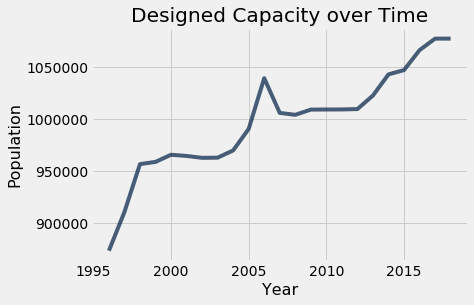

In [101]:
design_capacity_ca.plot("year", "designed_capacity sum")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Designed Capacity over Time")

We will focus on some years that mark important shifts as a result of realigmnet. 

Lets look at the year **2011**. 


In [102]:
design_capacity_2011 = design_capacity_ca.where("year", 2011)
design_capacity_2011

year,designed_capacity sum
2011,1009197


 **To add red dots**: `plt.plot`(*x_coordinate*, *y_coordinate*, *line porperty* ). 

Using **total_capacity_2011**, can now assign **x_coordinate_2011** to the **year** column and the **y_coordinate_2011** to the **designed_capacity sum** column. 


In [103]:
x_coordinate_2011 = design_capacity_2011.column('year')
y_coordinate_2011 = design_capacity_2011.column("designed_capacity sum")

Now you are ready to add the dot to the plot.

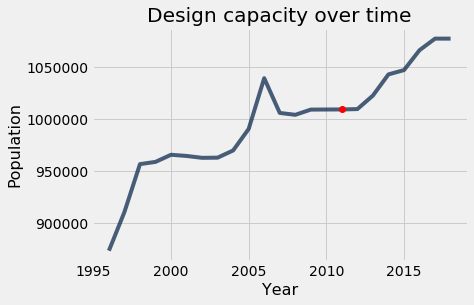

In [104]:
design_capacity_ca.plot("year", "designed_capacity sum")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Design capacity over time")

plt.plot(x_coordinate_2011, y_coordinate_2011, 'ro')

### Question 1

**Looking at the graph produced in the section above how does it reflect the systematic changes of the PIC? Name a court case that is represented by a red dot on the plot above.**

*double click this cell to type your response*

### Question 2

**What do you think happened in 2006 that caused that spike?**

*double click this cell to type your response*

### 2.2 Total Population in California's Prisons over time

Through the last section, we observed the change in the number of people prisons are designed to hold. Given this change over time, we wanted to compare it with the actual number of people within California's prisons. To do this, we will calculate the percent at which prisons were filled based on *how many people each prison is designed to hold*. Here is our original dataset for reference:

In [105]:
prisons.show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
0,1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760


**Data Cleaning**: Let's look at how the prison population changed over time in regards to the number of incarcerated people a prison is designed to hold. It is not necessary to look at the whole table, thus we will only look at the following varibles: `year`, `total_population`, `designed_capacity`. Just like in the last section, we use the function `select()` to cut the data table and save it to a new varible called `prison_pop_design` as we will be working with this later. Finally we use `show` to limit the number of rows that appear in our table.  

In [106]:
total_pop_and_design = prisons_updated.select("year", "total_population", "designed_capacity")
total_pop_and_design.show(5)

year,total_population,designed_capacity
1996,2294,1980
1996,322,320
1996,790,400
1996,2859,2004
1996,794,500


Now we want to see what is the `designed_capacity` and `total_population` for **all** the prisons in a given year. We will do this by grouping by **year** using the fucntion `group` and summing over all the prisons in that year, so that we can see how the population changed over time.

In [107]:
sum_total_and_design = total_pop_and_design.group("year", sum)
sum_total_and_design.show(5)

year,total_population sum,designed_capacity sum
1996,1623806,873676
1997,1739423,910797
1998,1788142,956740
1999,1818019,958881
2000,1820519,965721


Calculated the percentage of people within California's prisons with respect to the designed population size for **all** prisons within a certain year. Note: we are calculating the percentage, so we will be multiplying our proportion by 100.

To do this, we will get the values from our table by using the `column()` function. The `column()` function gets all the values from a single column in our table, and make them an array.

From class we learned that prisons were designed to be overcrowded. In this section we will explore by how much.

In [108]:
total_population = sum_total_and_design.column("total_population sum") 
designed_sum = sum_total_and_design.column("designed_capacity sum")

capacity_percentage = (total_population / designed_sum) * 100
capacity_percentage

array([ 185.85905988,  190.97812136,  186.89947112,  189.59797931,
        188.51397039,  186.46297264,  186.17592316,  188.84950734,
        192.63564133,  190.09189001,  188.49532912,  195.52605312,
        190.30095205,  183.36618572,  178.73669545,  173.23535445,
        149.88321645,  144.95077023,  138.83530151,  132.72696534,
        131.7232109 ,  132.02795138,  131.94811151])

Now that we have these percentages, we must add them to our table, so that we can graph them. To add another column to a table, we use the function called `with_column()`. The `with_column()` function adds a column to a table when it is given a new column name and the column values. The format is:  *data_table*`.with_column(`*column_name, column_values*`)`

In [109]:
total_and_design_and_percentages_table = sum_total_and_design.with_column("Design Percent", capacity_percentage)
total_and_design_and_percentages_table.show(3)

year,total_population sum,designed_capacity sum,Design Percent
1996,1623806,873676,185.859
1997,1739423,910797,190.978
1998,1788142,956740,186.899


### Question 1
**What can you tell about the design percent column in our table?**

*double click this cell to type your response*

Now lets plot how overcrowding changed over time, by observing the change in the percentage of people within prisons in comparison to how many people prisons are designed to hold.

**Plotting**: Using the same technique as above, below we drew a line plot to reflect the **overcrowding of California's state prisons over time**.

The format for plotting is: 
* **To draw plot**:
*data_table*.`plot(`*x_variable*, *y_variable*`)`. Where the x and y varibles stand for the name of the columns in our data table
* **To label plot**: We use `plt.xlabel`(*x_axis name*), `plt.ylabel`(*y_axis name*), `plot.title`(*plot_title*)

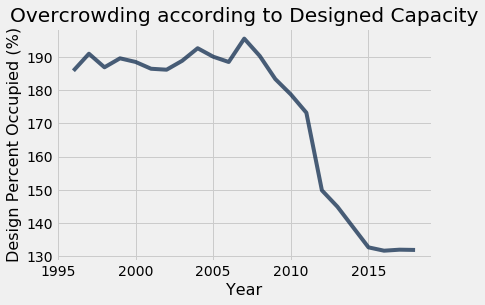

In [110]:
total_and_design_and_percentages_table.plot("year", "Design Percent")

plt.xlabel("Year")
plt.ylabel("Design Percent Occupied (%)")
plt.title("Overcrowding according to Designed Capacity")

### Question 2
**What is the trend of the line?**

*double click this cell to type your response*

### 2.3 Staffed Capcacity

We have seen how prisons exceed the number of prisoners they are designed to have. They exceed the number of people per designated space. However, a key aspects to these institutions are the hundreds of people employed to maintain this system. The number of people needed to maintain this system differs from both the number of people within these institutions and the number of people these institutions are designed to hold. We will observe the differences in the following section.

Similar to the sections above, we will use the `select()` function to look at the following variables: `year`, `total_population`, `staffed_capacity`.

In [111]:
total_pop_and_staff = prisons_updated.select("year", "total_population", "staffed_capacity")
total_pop_and_staff.show(3)

year,total_population,staffed_capacity
1996,2294,1980
1996,322,320
1996,790,760


To see what the `staffed_capacity` and `total_population` for **all** the prisons in a given year, we will group by **year** using the function `group` and summing over all the prisons in that year, so that we can see how the population changed over time.

In [112]:
pop_and_staff_sum = total_pop_and_staff.group("year", sum)
pop_and_staff_sum.show(3)

year,total_population sum,staffed_capacity sum
1996,1623806,1603264
1997,1739423,1713086
1998,1788142,1788475


Likewise, to the previous example, we want to calculate a proportion in this question as well. This time we want to calculate the proportion of people within a prison given the amount of staff employed to maintain the prison.

In [113]:
population_column = pop_and_staff_sum.column("total_population sum")
staff_capacity_column = pop_and_staff_sum.column("staffed_capacity sum")

staff_capacity_percentage = (population_column / staff_capacity_column)* 100
staff_capacity_percentage

array([ 101.28126123,  101.53740092,   99.98138079,   99.77159239,
         99.58683247,   99.48019624,   99.67990711,   99.20419093,
         99.2917914 ,   98.58947776,  100.15123527,   98.60342226,
         98.65553117,   97.77068179,   98.05314295,   99.07368789,
         98.33165891,  100.11090436,   95.30052336,   90.83579994,
         91.49697673,   96.43139026,   96.93737037])

With these percentages, we can add them to our table. Recall the previous example, to add another column to a table, we use the function called `with_column()`. 
- *data_table*`.with_column(`*column_name, column_values*`)`

In [114]:
staff_and_total_percent_table = pop_and_staff_sum.with_column("Staff Percent", staff_capacity_percentage)
staff_and_total_percent_table.show(3)

year,total_population sum,staffed_capacity sum,Staff Percent
1996,1623806,1603264,101.281
1997,1739423,1713086,101.537
1998,1788142,1788475,99.9814


To illustrate the change over time, we will create a line plot to reflect the **overcrowding of California's state prisons over time according to the staffing capacity of prison.**.

The format for plotting is: 
* **To draw plot**:
*data_table*.`plot(`*x_variable*, *y_variable*`)`. Where the x and y varibles stand for the name of the columns in our data table
* **To label plot**: We use `plt.xlabel`(*x_axis name*), `plt.ylabel`(*y_axis name*), `plot.title`(*plot_title*)

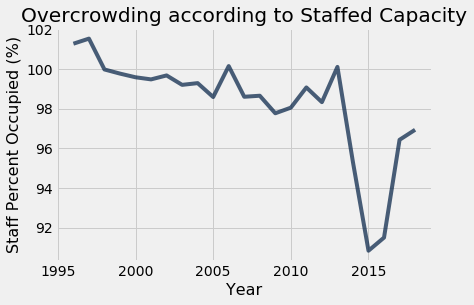

In [115]:
staff_and_total_percent_table.plot("year", "Staff Percent")

plt.xlabel("Year") 
plt.ylabel("Staff Percent Occupied (%)")
plt.title("Overcrowding according to Staffed Capacity")

### Question 1

**What trend do you notice on the line plot?**

*double click this cell to type your response*

### 2.4 Designed Capacity versus Staff Capacity

Through the last two examples, we saw how crowded prisons have been overtime by looking at their designed capacity and staffed capacity. However, it is still unclear what the difference between the two percentages is. Therefore, to compare the two capacity rates and how they have changed over time.

To do this, we will create a new table with three columns, namely 
* Year
* Design Percentage
* Staff Percentage


*Please refer to the intro to Python notebook if you do NOT recall how to make a table*

To get the **years** in our table we will use a function called `np.arange` since we know the range for the years we want to use. We will illustrate with an example below. Notice that the upper bound is NOT inclusive. Thus, we will have to add 1 to the year in which we want to end. 

The other two columns can be obtained by calling the variables we had defined in the sections before. Namely, **capacity_percentage** for Design Percentage and **staff_capacity_percentage** for Staff Percentage

In [116]:
lower_bound= 1996 
upper_bound = 2018+1
years= np.arange(lower_bound,upper_bound)
years

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

In [117]:
compare_table_design_and_staff = Table().with_columns(["year", years,
                                    "Design Percentage", capacity_percentage,
                                    "Staff Percentage", staff_capacity_percentage])

compare_table_design_and_staff.show(5)

year,Design Percentage,Staff Percentage
1996,185.859,101.281
1997,190.978,101.537
1998,186.899,99.9814
1999,189.598,99.7716
2000,188.514,99.5868


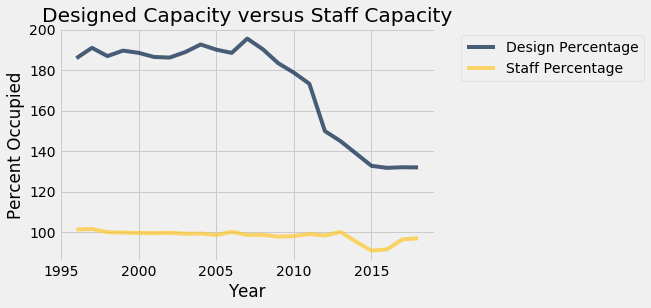

In [118]:
compare_table_design_and_staff.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity")

### Question 4
**Consider the large gap between the two lines. Why is staff capacity much closer to 100% than designed capcacity?**

*double click this cell to type your response*

### 2.5 Interactive Widget

We have created and interactive widget for you in this section. In this example,you will be able to scroll through all of the prisons in Calfornia, and you can see how the designed capacity versus population has changed over time.
Run the following cell to produce the widget

In [119]:
widgets.HBox([widgets.VBox([inp]), out])

### Question 5
**Select any institution from the widget that has 3 points on its graph, and analyze how that institution's designed capacity changed over time. Predict how would the design capacity compare with the staff capacity of that specific institution.**

*double click this cell to type your response*

## 3. GENDER DIVISION <a id='subsection4'></a>
---
**Context:** The system reinforces the idea that average inmate holds certain characteristics. Since we have a limited data sets we cannot investigate many aspects of this claim. However, in order to get a better understanding of the populations that the prison industrial complex was made to hold, we will investigate a few variables such as gender divisions, design capacity, and staff capacity. 


Lets begin by looking at all the **unique** institutions on our dataset. To do this, we will use the `group` function. The count of the table below represents the number of months for which we have data for a given institution. The maximum counts that any of the institutions *should* have is 276 since we are only looking at 23 years (12 months/year X 23 years).

In [122]:
prisons_updated.group("institution_name").show()

institution_name,count
ASP (AVENAL SP),276
CAL (CALIPATRIA SP),276
CCC (CA CORRECTIONAL CENTER),276
CCI (CA CORRECTIONAL INSTITUTION),276
CCWF (CENTRAL CA WOMEN'S FAC),276
CEN (CENTINELA SP),276
CHCF (CA HEALTH CARE FAC - STOCKTON),66
CIM (CA INSTITUTION FOR MEN),276
CIW (CA INSTITUTION FOR WOMEN),276
CMC (CA MEN'S COLONY),276


Since the data is made up of both male and female prisons. We have to sort these prisons into separate groups before we can analyze them separately. However, the institution names in our table are not always easy to decipher as male or female institutions. We had to double check whether an institution was male or female using sources outside of this notebook. One of the instituions that we found to be particuarly interesting when looking at these outside sources was **VSP (VALLEY SP)**.
The California Department of Corrections and Rehabilitation began converting Valley State Prison into a facility for low-risk male inmates in October 2012, and it completed by January 2013. 
[Press here to learn more](https://web.archive.org/web/20120111104018/http://cdcrtoday.blogspot.com/2011/12/cdcr-announces-plan-to-convert-female.html) and [Here](https://www.cdcr.ca.gov/Facilities_Locator/VSP.html) From these links you will learn that this shift came as a result of the policy of realignmnet. We can also notice that monthly count for this institution was above of 276, which could indicate monthly double counts for male and female during this period. Though we handled this issue before we read the data at the beginning of the notebook, running these sanity checks is important to not get misleading results. 

### 3.1 Unique Female Prisions

In this section, we will find all the data corresponding to female institutions. In the cell below we look only at the prisons which we know are strictly female.

Recall the first section where we separated the data in 

In [126]:
female_institutions = make_array("CCWF (CENTRAL CA WOMEN'S FAC)", 'CIW (CA INSTITUTION FOR WOMEN)',
       'CRC (CAL REHAB CTR, WOMEN)', 'FOL (FOLSOM SP) (FEMALE)',
       'FRCC (FRCCC BAKERSFIELD)', "NCWF (NO CAL WOMEN'S FACIL)", "VALLEY SP (FEMALE)")

**Filtering**: Often times we want to look at a portion of the data that meets certain conditions, so that we can view a pattern among smaller portions of the data. In this case, we want to observing the difference between female and male institutions. To do that we are filtering data into two groups. The first contains **only female institutions** and the second contains only male institutions. 

Filtering works by looking at a single column of values and checking the filtering condition to see if each value in the column is true. All of the true values are put into a new table. 

The format for filtering is: 
* **To filter table**:
*data_table*.`where(`*column_name*, *filter*`)`. 
    - the `column_name` is one of the columns in the data_table
    - the `filter` has two parts:
        - there must be some condition to the values we are looking at: `are.equal_to()`, `are.contained_in()`, `are.not_contained_in()`
        - the second part is the input to the first part. (can be a number or a word or list)

In [130]:
female_data = prisons_updated.where("institution_name", are.contained_in(female_institutions))
female_data.show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
2,1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
3,1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
4,1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842


Now we will group together each institution to learn about the number of occurrences for each institution. 

In [131]:
female_prisons = female_data.group("institution_name")
female_prisons

institution_name,count
CCWF (CENTRAL CA WOMEN'S FAC),276
CIW (CA INSTITUTION FOR WOMEN),276
"CRC (CAL REHAB CTR, WOMEN)",138
FOL (FOLSOM SP) (FEMALE),72
FRCC (FRCCC BAKERSFIELD),17
NCWF (NO CAL WOMEN'S FACIL),85
VALLEY SP (FEMALE),204


### 3.1.1 Design Capacity versus Staff Capacity for Female Institutions

We are using the `select()` function to get relevant data.

In [132]:
fem_year_pop_capacities = female_data.select("year", "total_population", "designed_capacity", "staffed_capacity")
fem_year_pop_capacities.show(3)

year,total_population,designed_capacity,staffed_capacity
1996,790,400,760
1996,2859,2004,3224
1996,794,500,842


We want to combine all the values for the same year.

In [133]:
fem_year_groups = fem_year_pop_capacities.group("year", sum)
fem_year_groups.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum
1996,108007,72120,104654
1997,120200,70920,115384
1998,125888,70920,123282


Using the same technique as the other example, we will calculate the percent occupied for female prisons. First we will do this for designed capacity and directly after we will calculate for staffed capacity.

Lets begin by getting the female total population. We will do this by selecting the column we are interested in, and then add it to a new varaible called `female_total_population`.

In [134]:
fem_total_population = fem_year_groups.column("total_population sum") 

Now we will calculate the design capacity percentages and the staff capacity percentages.

In [135]:
fem_design_capacity = fem_year_groups.column("designed_capacity sum")

fem_design_percentage = (fem_total_population / fem_design_capacity) *100
fem_design_percentage

array([ 149.76012202,  169.48674563,  177.5070502 ,  179.142696  ,
        175.00282008,  163.69430344,  154.26536943,  169.52645821,
        179.30883243,  183.48045024,  183.12193239,  197.49326146,
        200.90218275,  193.73104302,  178.17707134,  167.37261742,
        122.90590935,  156.7833259 ,  158.91371003,  140.55847569,
        136.50240911,  137.92159439,  135.71616294])

In [136]:
fem_staff_capacity = fem_year_groups.column("staffed_capacity sum")

fem_staff_percentage =(fem_total_population / fem_staff_capacity)*100
fem_staff_percentage

array([ 103.20389092,  104.17388893,  102.11385279,   98.5043845 ,
        100.29576714,   99.26380683,  100.40932828,  101.93347193,
        100.57430312,  104.14789159,  102.9611944 ,   98.83839444,
         98.81032945,   97.20246599,   96.3765347 ,   97.98165807,
         96.07339952,  101.42329767,  100.96428124,   88.56918109,
         86.04898387,   95.87570793,   96.5775201 ])

With the percentages we just calculated we want to add them to the table, so we will use the `with_column()` function.

In [137]:
fem_year_design = fem_year_groups.with_column("Design Percent Occupied", fem_design_percentage)
fem_year_design.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied
1996,108007,72120,104654,149.76
1997,120200,70920,115384,169.487
1998,125888,70920,123282,177.507


In [138]:
fem_year_design_and_staff = fem_year_design.with_column("Staff Percent Occupied", fem_staff_percentage)
fem_year_design_and_staff.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied,Staff Percent Occupied
1996,108007,72120,104654,149.76,103.204
1997,120200,70920,115384,169.487,104.174
1998,125888,70920,123282,177.507,102.114


At this point we have calculated the percentages of design and staff capacity for female institutions, and have all the information we need to plot them. However, we have information we no longer need in the table, so we will select only the columns that we need using the `select()` function.

In [139]:
fem_plot_table = fem_year_design_and_staff.select("year", "Design Percent Occupied", "Staff Percent Occupied")
fem_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,149.76,103.204
1997,169.487,104.174
1998,177.507,102.114


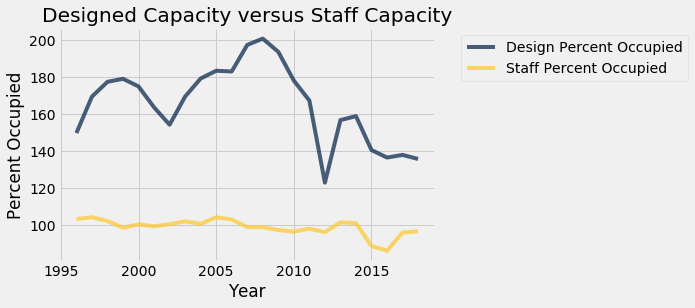

In [140]:
fem_plot_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity")


### 3.2 Unique Male Prisoners

We want to observe the changes in male prisons separate from female prisons. In order to do that, we will filter the table to have only male institutions. To do this, we will using the `where()` function which allows us to select the rows that contain male institutions. Or another way to think about it is that we are excluded rows with female institutions.

In [142]:
male_data = prisons_updated.where("institution_name", are.not_contained_in(female_institutions))
male_data.show(3)

Unnamed: 0,year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1,1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
6,1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
7,1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884


### 3.2.1 Design Capacity versus Staff Capacity for Male Institutions

We want to analyze the design and staff capacities over time, so we will use the `select()` function to get relevant data.

In [143]:
male_year_design_staff = male_data.select("year", "total_population", "designed_capacity", "staffed_capacity")
male_year_design_staff.show(3)

year,total_population,designed_capacity,staffed_capacity
1996,322,320,320
1996,4537,2484,4484
1996,6010,3606,5884


In [144]:
male_grouped_year = male_year_design_staff.group("year", sum)
male_grouped_year.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum
1996,1515799,801556,1498610
1997,1619223,839877,1597702
1998,1662254,885820,1665193


Lets begin by getting the male total population. We will do this by selecting the column we are interested in, and then add it to a new varaible called `male_total_population`

In [145]:
male_total_population = male_grouped_year.column("total_population sum")

Now we will calculate the design capacity percentages and the staff capacity percentages.

In [146]:
male_design_capacity =  male_grouped_year.column("designed_capacity sum")

male_design_percentage = (male_total_population / male_design_capacity)* 100
male_design_percentage

array([ 189.10706176,  192.79287324,  187.6514416 ,  190.43302577,
        189.58483506,  188.26986429,  188.7134137 ,  190.28339268,
        193.61065069,  190.57552881,  188.89850953,  195.38616189,
        189.57973217,  182.65700591,  178.77529575,  173.6337556 ,
        151.67108148,  144.40785033,  137.91593335,  132.36983713,
        131.50935704,  131.76706454,  131.78131568])

In [147]:
male_staff_capacity =  male_grouped_year.column("staffed_capacity sum")

male_staff_percentage = (male_total_population / male_staff_capacity) *100
male_staff_percentage

array([ 101.14699622,  101.34699712,   99.82350394,   99.86811985,
         99.53535885,   99.49516184,   99.63285895,   99.02889624,
         99.20607427,   98.22028826,   99.95281601,   98.58657586,
         98.64438976,   97.81217575,   98.17054621,   99.14607073,
         98.45594391,  100.0464141 ,   95.01929712,   90.94850361,
         91.76682659,   96.45729307,   96.95383898])

Just as in the female institution example,now we are adding both of these percentages to the table.

In [148]:
male_year_design = male_grouped_year.with_column("Design Percent Occupied", male_design_percentage)
male_year_design.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied
1996,1515799,801556,1498610,189.107
1997,1619223,839877,1597702,192.793
1998,1662254,885820,1665193,187.651


In [149]:
male_design_and_staff = male_year_design.with_column("Staff Percent Occupied", male_staff_percentage)
male_design_and_staff.show(3)

year,total_population sum,designed_capacity sum,staffed_capacity sum,Design Percent Occupied,Staff Percent Occupied
1996,1515799,801556,1498610,189.107,101.147
1997,1619223,839877,1597702,192.793,101.347
1998,1662254,885820,1665193,187.651,99.8235


For the plot we only need 3 columns, so we will use the `select()` function to get those columns. 

In [150]:
male_plot_table = male_design_and_staff.select("year", "Design Percent Occupied", "Staff Percent Occupied")
male_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,189.107,101.147
1997,192.793,101.347
1998,187.651,99.8235


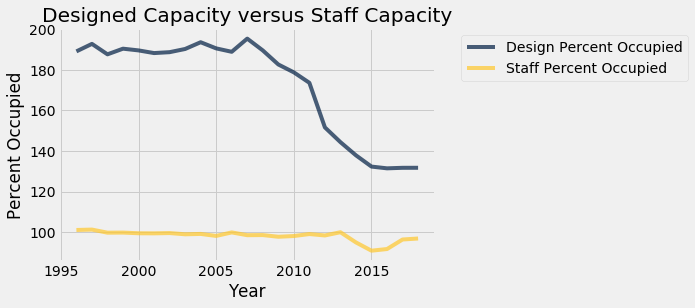

In [151]:
male_plot_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Designed Capacity versus Staff Capacity")

### 3.3 Famale vs Male prisons: Designed and Staffed Capacities

Although we can compare the two plots side by side to contrast male and female institutions, it would be better to look at them on the same graph, so we will set up the table to plot them together. Here are the two tables we used to draw the plots above. 

In [152]:
fem_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,149.76,103.204
1997,169.487,104.174
1998,177.507,102.114


In [153]:
male_plot_table.show(3)

year,Design Percent Occupied,Staff Percent Occupied
1996,189.107,101.147
1997,192.793,101.347
1998,187.651,99.8235


In order to merge the two tables, we want to differentiate between the column `Design Percent Occupied` in the female table versus in the male table. To do this, we will relabel the column names. The function that will relabel to the column names is called `relabel()`. 

The format for the function is: 
- *data_table*.`relabel(`*original_name*, *new_name*`)`

We relabeled the design column and the staff column for both male and female institutions.

In [154]:
male_one_relabeled = male_plot_table.relabeled("Design Percent Occupied", "Male Designed Percentage")
male_one_relabeled.show(3)

year,Male Designed Percentage,Staff Percent Occupied
1996,189.107,101.147
1997,192.793,101.347
1998,187.651,99.8235


In [155]:
male_all_relabeled = male_one_relabeled.relabeled("Staff Percent Occupied", "Male Staffed Percentage")
male_all_relabeled.show(3)

year,Male Designed Percentage,Male Staffed Percentage
1996,189.107,101.147
1997,192.793,101.347
1998,187.651,99.8235


In [156]:
fem_one_relabeled = fem_plot_table.relabeled("Design Percent Occupied", "Female Designed Percentage")
fem_one_relabeled.show(3)

year,Female Designed Percentage,Staff Percent Occupied
1996,149.76,103.204
1997,169.487,104.174
1998,177.507,102.114


In [157]:
fem_all_relabeled = fem_one_relabeled.relabeled("Staff Percent Occupied", "Female Staffed Percentage")
fem_all_relabeled.show(3)

year,Female Designed Percentage,Female Staffed Percentage
1996,149.76,103.204
1997,169.487,104.174
1998,177.507,102.114


Now that we have distinct design and staff capacities for male and female groups, we can match the values by year. They contain information over the same years. To combine tables, we use the function called `join()`. The format for the function is:
- *data_table_one*`.join(` *same_column*, *data_table_two*`)` where same_column is the name of the column that appears in both tables.

In [158]:
male_and_female_table = male_all_relabeled.join("year", fem_all_relabeled)
male_and_female_table.show(3)

year,Male Designed Percentage,Male Staffed Percentage,Female Designed Percentage,Female Staffed Percentage
1996,189.107,101.147,149.76,103.204
1997,192.793,101.347,169.487,104.174
1998,187.651,99.8235,177.507,102.114


### 3.3.1 Designed Capacity: Male versus Female

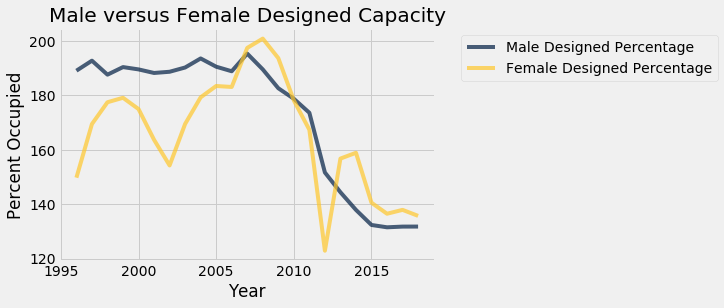

In [159]:
select_design = male_and_female_table.select("year", "Male Designed Percentage", "Female Designed Percentage")

select_design.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male versus Female Designed Capacity")

### 3.3.2 Staffed Capacity: Male versus Female

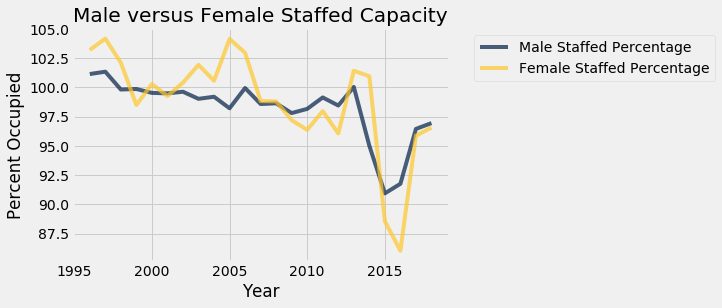

In [160]:
select_staff = male_and_female_table.select("year", "Male Staffed Percentage", "Female Staffed Percentage")

select_staff.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male versus Female Staffed Capacity")

### 3.3.3 Male Prisons versus Female Prisons in both Staffed and Designed Capacity


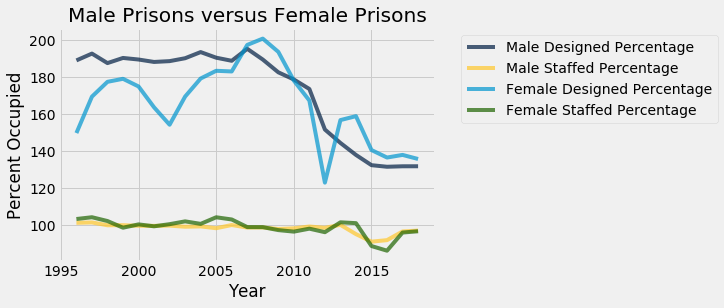

In [161]:
male_and_female_table.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons")

How does the combination of male and female institutions compare with the individual institutions? To answer this question, let's look back to the beginning where we defined the table called `compare_table_design_and_staff`.

In [162]:
compare_table_design_and_staff.show(3)

year,Design Percentage,Staff Percentage
1996,185.859,101.281
1997,190.978,101.537
1998,186.899,99.9814


We want to combine the total percentages table with the table that contains the percentages for male and female prisons separately. To combine the two tables, we will use the `join()` function from the last section. Here is the format:
- *data_table_one*`.join(` *same_column*, *data_table_two*`)` where same_column is the name of the column that appears in both tables.

In [163]:
all_joined = compare_table_design_and_staff.join("year", male_and_female_table)
all_joined.show(3)

year,Design Percentage,Staff Percentage,Male Designed Percentage,Male Staffed Percentage,Female Designed Percentage,Female Staffed Percentage
1996,185.859,101.281,189.107,101.147,149.76,103.204
1997,190.978,101.537,192.793,101.347,169.487,104.174
1998,186.899,99.9814,187.651,99.8235,177.507,102.114


To view all of the design percentages, we must select those columns from the table using the `select()` function. With those columns we can use the `plot()` function to display the data.

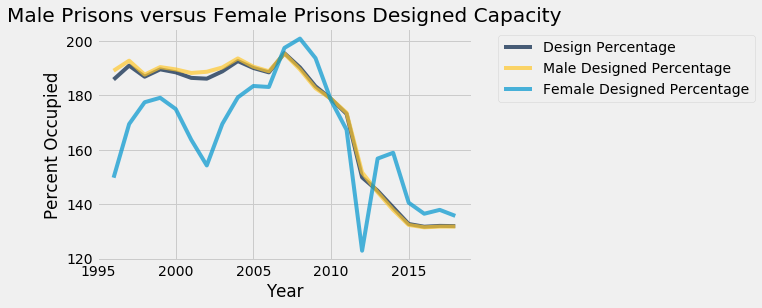

In [164]:
design_all = all_joined.select("year", "Design Percentage", "Male Designed Percentage", "Female Designed Percentage")
design_all.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons Designed Capacity")

To view all of the staff percentages, we must select those columns from the table using the `select()` function. With those columns we can use the `plot()` function to display the data.

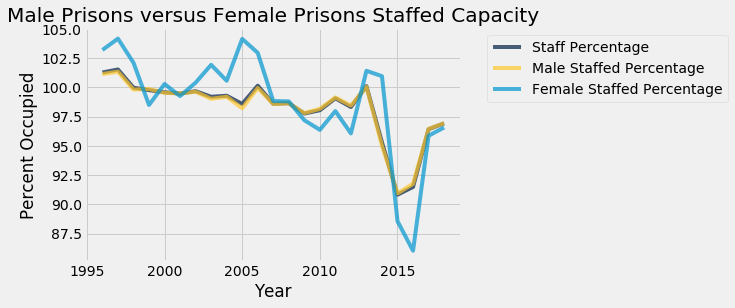

In [165]:
staff_all = all_joined.select("year", "Staff Percentage", "Male Staffed Percentage", "Female Staffed Percentage")
staff_all.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons Staffed Capacity")

Here are all the plots together on the same plot.

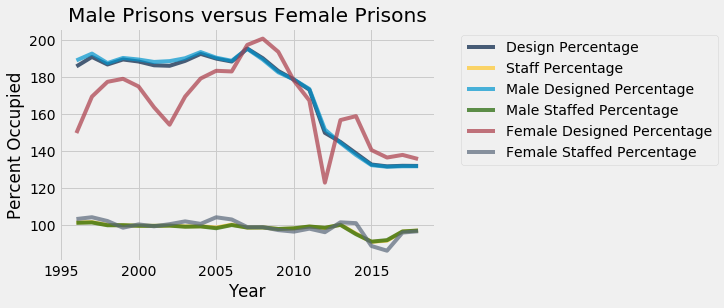

In [166]:
all_joined.plot("year")

plt.xlabel("Year")
plt.ylabel("Percent Occupied")
plt.title("Male Prisons versus Female Prisons")

### Question 1
**Comment on the plot above. What are some similarities we about th designed capacity of prisons in California? What are the differences between designed and staffed capacity? What are some patterns unique to female institutions? Why does the total population look almost identitical to the male prisons percentages?**

*double click this cell to type your response*

---
# JAILS<a id='section2'></a>
---

On the **Prisons** section we learned about the data, how to clean it, and how to plot it. One of the most valuable things that you can take away from this notebook is the importance of context. This is your chance to put everything you have learned to practice. In the **Jails** section, you will conduct similar analysis to the one you conducted in the section above, but now we will look at different variables. As you move along through this notebook, try not to worry to much about the code, and keep the goal in mind "understand key features of the prison complex and policies of realignment through the data". 

## Note to Shalani: Please add some information about this data set (e.g. data collection process, why is this data useful for the purpose of realignmnet, etc.)

## 1. DATA<a id='subsection4'></a>

Lets begin by reading the csv into notebook. We will save it on a table called `jails`.

In [86]:
jails = Table().read_table("jails_cleaned.csv")
jails.show(3)

Unnamed: 0,Jurisdiction,Facility,Year,Month,Unsentenced males,Unsentenced females,Sentenced males,Sentenced females,Total facility ADP
0,Alameda Sheriff's Dept.,Glen Dyer Jail,1995,10,539,1,143,0,683
1,Alameda Sheriff's Dept.,Santa Rita Jail,1995,10,1983,197,887,166,3233
2,Amador Sheriff's Dept.,Amador County Jail,1995,10,15.33,1.59,21.7,4.85,43.47


In [87]:
jail_year = jails.drop("Unnamed: 0").group("Year", sum).drop("Month sum", "Facility sum", "Jurisdiction sum")
jail_year.show(3)

Year,Unsentenced males sum,Unsentenced females sum,Sentenced males sum,Sentenced females sum,Total facility ADP sum
1995,111311,13430.4,73436.1,11201.6,209225
1996,444830,55555.7,300297,44444.9,845128
1997,461675,64381.5,326194,52028.7,904279


## Analyzing the Data
Let's first take a look at the total facility ADP over time.

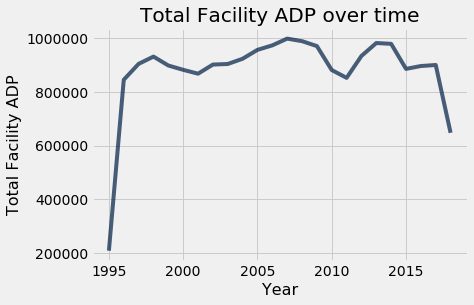

In [88]:
# total facility ADP over time
jail_year.plot("Year", "Total facility ADP sum")
plt.xlabel("Year")
plt.ylabel("Total Facility ADP")
plt.title("Total Facility ADP over time")

Due to realignment, the years of 2011, 2013, and 2014 were significant. Let's see how these specific years play out on our plot above by plotting red dots representing those years.

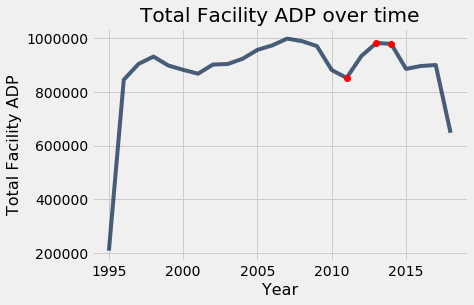

In [89]:
jail2011 = jail_year.where("Year", 2011)
jail2013 = jail_year.where("Year", 2013)
jail2014 = jail_year.where("Year", 2014)

x_2011 = jail2011.column('Year')
y_2011 = jail2011.column("Total facility ADP sum")

x_2013 = jail2013.column('Year')
y_2013 = jail2013.column("Total facility ADP sum")

x_2014 = jail2014.column('Year')
y_2014 = jail2014.column("Total facility ADP sum")


jail_year.plot("Year", "Total facility ADP sum")
plt.xlabel("Year")
plt.ylabel("Total Facility ADP")
plt.title("Total Facility ADP over time")

plt.plot(x_2011, y_2011, 'ro')
plt.plot(x_2013, y_2013, 'ro')
plt.plot(x_2014, y_2014, 'ro')

Let's compare the sentenced and unsentenced population for county jails (over all the years since 1995)
overall (male and female) sentenced and (male and female) unsentenced
male unsentenced vs male sentenced
female unsentenced vs female sentenced

In [90]:
# overall (male and female) sentenced and (male and female) unsentenced
# first we need to get the total sentence and the total unsentenced per year
m_sent = jail_year.column("Sentenced males sum")
f_sent = jail_year.column("Sentenced females sum")
m_unsent = jail_year.column("Unsentenced males sum")
f_unsent = jail_year.column("Unsentenced females sum")

sentenced_all = m_sent + f_sent
unsentenced_all = m_unsent + f_unsent

jail_year = jail_year.with_column("Total Sentenced", sentenced_all)
jail_year = jail_year.with_column("Total Unsentenced", unsentenced_all)

totals = jail_year.drop("Sentenced males sum", "Sentenced females sum", "Unsentenced males sum", "Unsentenced females sum", 'Total facility ADP sum')
totals.show(3)

Year,Total Sentenced,Total Unsentenced
1995,84637.7,124742
1996,344742,500385
1997,378223,526056


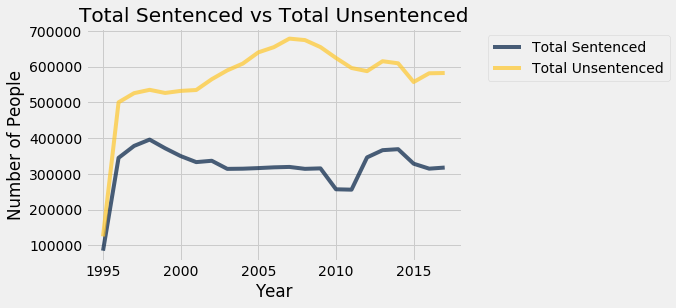

In [91]:
totals.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced")
plt.xlabel("Year")
plt.ylabel("Number of People")


Let's use the same data and numbers except find and plot the percentages of the total sentenced and unsentenced.

In [92]:
total_adp = jail_year.column("Total facility ADP sum")

sent_percent = sentenced_all / total_adp * 100
unsent_percent = unsentenced_all / total_adp * 100

jail_year = jail_year.with_column("Total Sentenced Percent", sent_percent)
jail_year = jail_year.with_column("Total Unsentenced Percent", unsent_percent)

percent_totals = jail_year.drop("Sentenced males sum", "Sentenced females sum", "Unsentenced males sum", "Unsentenced females sum", 'Total facility ADP sum', "Total Sentenced", "Total Unsentenced")
percent_totals

Year,Total Sentenced Percent,Total Unsentenced Percent
1995,40.4529,59.6207
1996,40.7917,59.2083
1997,41.8259,58.1741
1998,42.5142,57.4858
1999,41.3689,58.6311
2000,39.6463,60.3537
2001,38.3581,61.642
2002,37.3311,62.669
2003,34.7304,65.2696
2004,34.0513,65.9487


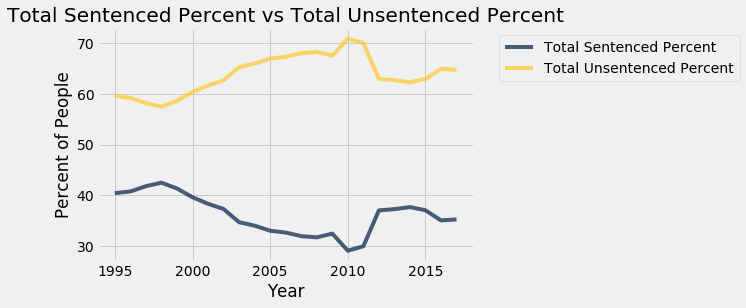

In [93]:
percent_totals.plot("Year")
plt.title("Total Sentenced Percent vs Total Unsentenced Percent")
plt.xlabel("Year")
plt.ylabel("Percent of People")

Next let's look at just the males sentenced vs males unsentenced.

In [94]:
males = jail_year.select("Year", "Sentenced males sum", "Unsentenced males sum")
males

Year,Sentenced males sum,Unsentenced males sum
1995,73436.1,111311
1996,300297,444830
1997,326194,461675
1998,337045,469013
1999,316691,463570
2000,299154,467164
2001,286330,472090
2002,290729,498173
2003,270378,518199
2004,270068,533929


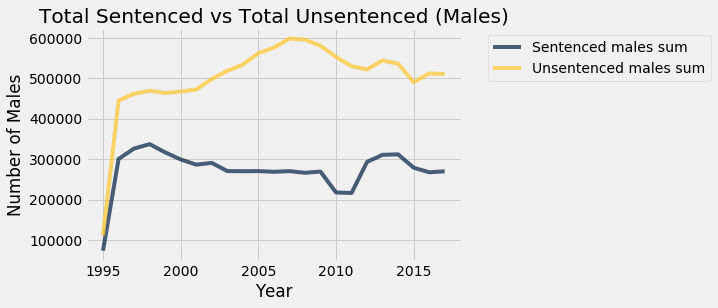

In [95]:
males.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced (Males)")
plt.xlabel("Year")
plt.ylabel("Number of Males")



In [96]:
# percent male
male_sent = males.column("Sentenced males sum")
male_unsent = males.column("Unsentenced males sum")

m_sent_percent = male_sent / total_adp * 100
m_unsent_percent = male_unsent / total_adp * 100

males = males.with_column("Total Male Sentenced Percent", m_sent_percent)
males = males.with_column("Total Male Unsentenced Percent", m_unsent_percent)

m_percent_totals = males.drop("Sentenced males sum", "Unsentenced males sum")
m_percent_totals.show(3)

Year,Total Male Sentenced Percent,Total Male Unsentenced Percent
1995,35.099,53.2016
1996,35.5328,52.6346
1997,36.0723,51.0544


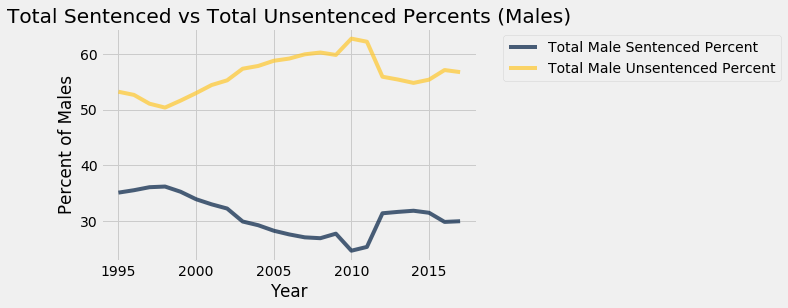

In [97]:
m_percent_totals.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced Percents (Males)")
plt.xlabel("Year")
plt.ylabel("Percent of Males")



Now's let us do the same analysis with the females.

In [98]:
females = jail_year.select("Year", "Sentenced females sum", "Unsentenced females sum")
females.show(3)

Year,Sentenced females sum,Unsentenced females sum
1995,11201.6,13430.4
1996,44444.9,55555.7
1997,52028.7,64381.5


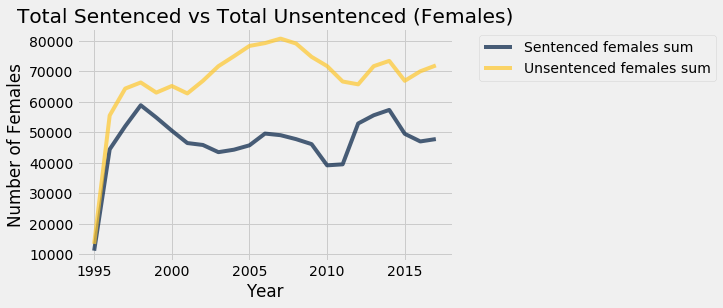

In [99]:
females.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced (Females)")
plt.xlabel("Year")
plt.ylabel("Number of Females")

In [100]:
# percent female
female_sent = females.column("Sentenced females sum")
female_unsent = females.column("Unsentenced females sum")

f_sent_percent = female_sent / total_adp * 100
f_unsent_percent = female_unsent / total_adp * 100

females = females.with_column("Total Female Sentenced Percent", f_sent_percent)
females = females.with_column("Total Female Unsentenced Percent", f_unsent_percent)

f_percent_totals = females.drop("Sentenced females sum", "Unsentenced females sum")
f_percent_totals.show(3)

Year,Total Female Sentenced Percent,Total Female Unsentenced Percent
1995,5.35384,6.4191
1996,5.25896,6.57364
1997,5.75361,7.11964


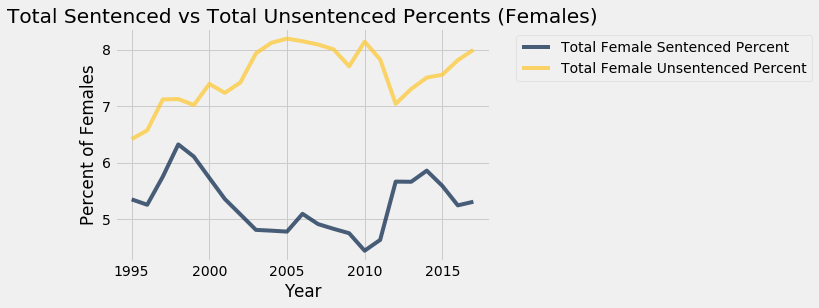

In [101]:
f_percent_totals.plot("Year")
plt.title("Total Sentenced vs Total Unsentenced Percents (Females)")
plt.xlabel("Year")
plt.ylabel("Percent of Females")

--- 
## Bibliography

---
Notebook developed by: Ashley Quiterio and  Shalini Kunapuli

Data Science Modules: http://data.berkeley.edu/education/modules

